First we read in the dataset from file.


In [1]:
import pandas as pd
data = pd.read_csv("dataset.csv")



Next we can clean the dataset. We drop the index column because it already exists (i think). Then we remove all duplicate values by checking the track id.

In [2]:
#drop index cus already is
data = data.drop("index", axis=1)
#print((data['track_id'] == "3nqQXoyQOWXiESFLlDF1hG").sum())
#removing duplicates
print(data.duplicated().sum())
data = data.drop_duplicates(subset=["track_id"])
print(data.duplicated().sum())

450
0


Next we remove the rows with duration = 0

In [3]:
data = data[data["duration_ms"] >= 1000]

We only found one row with empty values and since it had duration_ms as 0 then it has already been removed.
Next is EDA.

C:\Users\henrilipping\AppData\Local\anaconda3\Lib\site-packages\statsmodels\nonparametric\smoothers_lowess.py:226: RuntimeWarning: invalid value encountered in divide
C:\Users\henrilipping\AppData\Local\anaconda3\Lib\site-packages\plotnine\stats\smoothers.py:345: PlotnineWarning: Confidence intervals are not yet implemented for lowess smoothings.


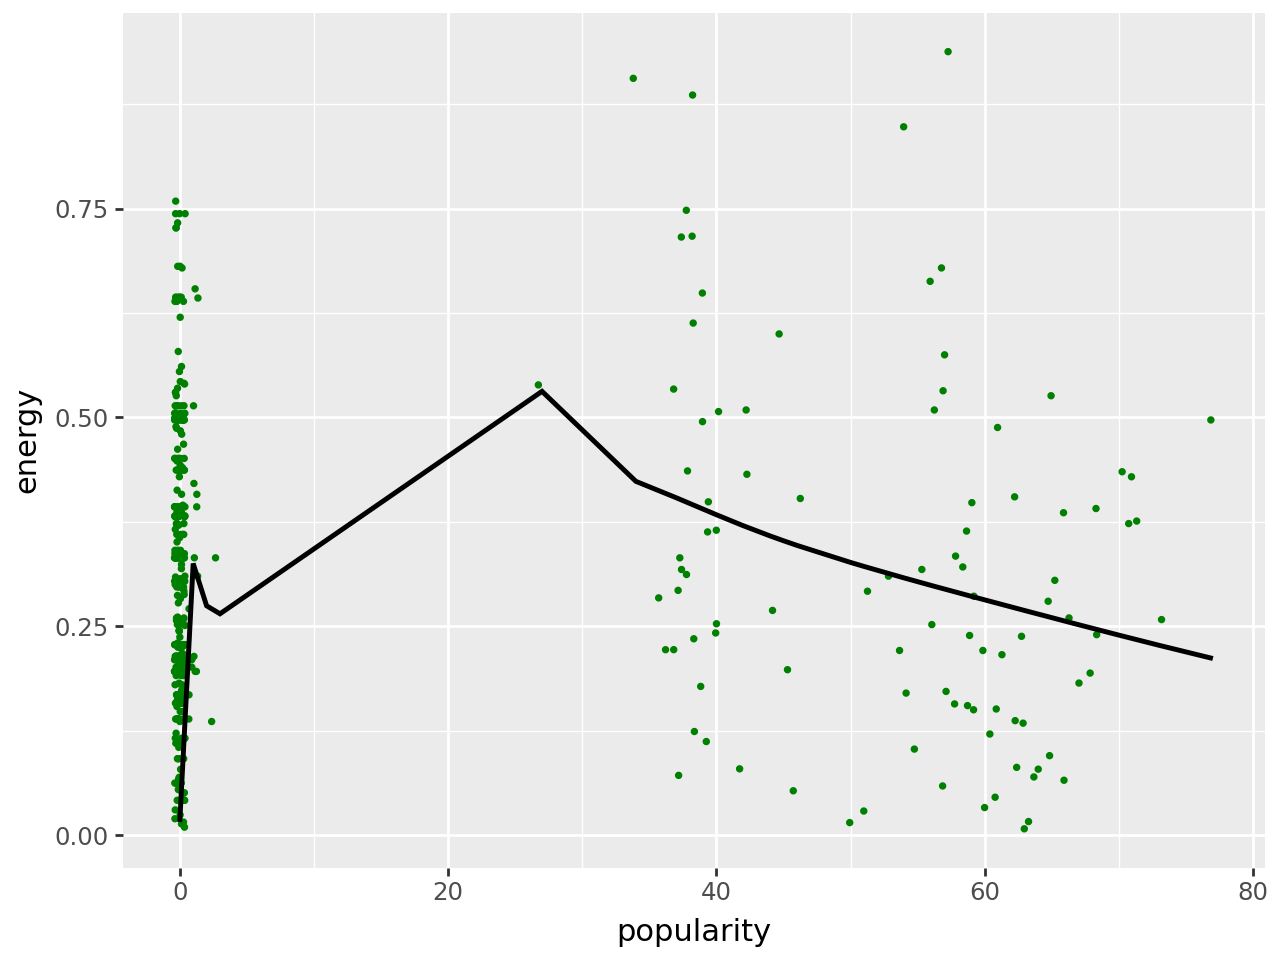

524


In [4]:
import plotnine as p9
from sklearn.model_selection import *
from sklearn.ensemble import RandomForestClassifier

#finding the graph from a specific genre and attribute
data_copy = data[data["track_genre"] == "jazz"]
display(
p9.ggplot(
data = data_copy,
    mapping = p9.aes(x='popularity', y='energy'))+
p9.geom_point(color="green", position="jitter", size=0.5) + p9.geom_smooth()
)

print((data["track_genre"] == "jazz").sum())

Plot for genre: acoustic


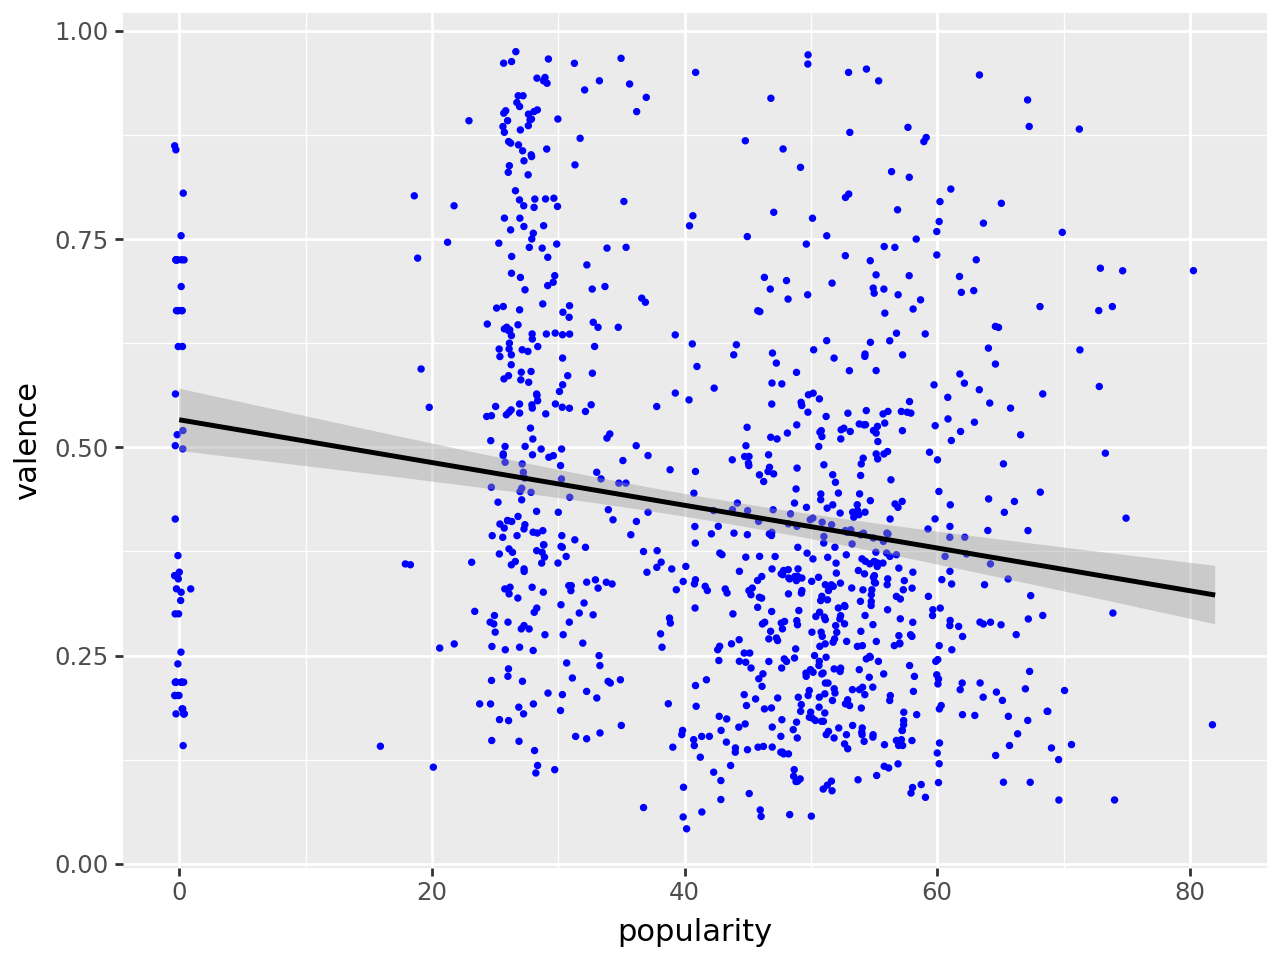

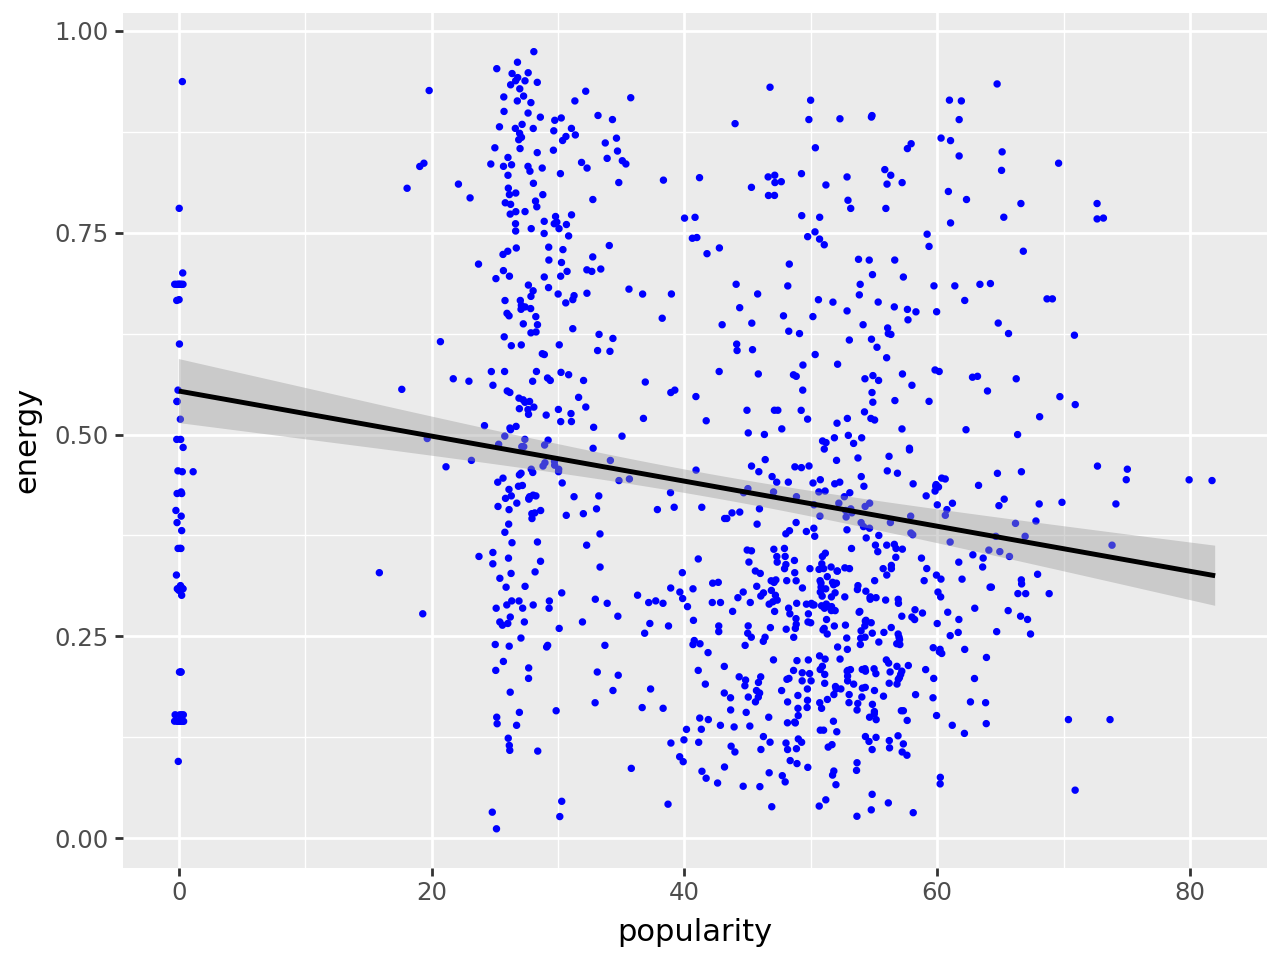

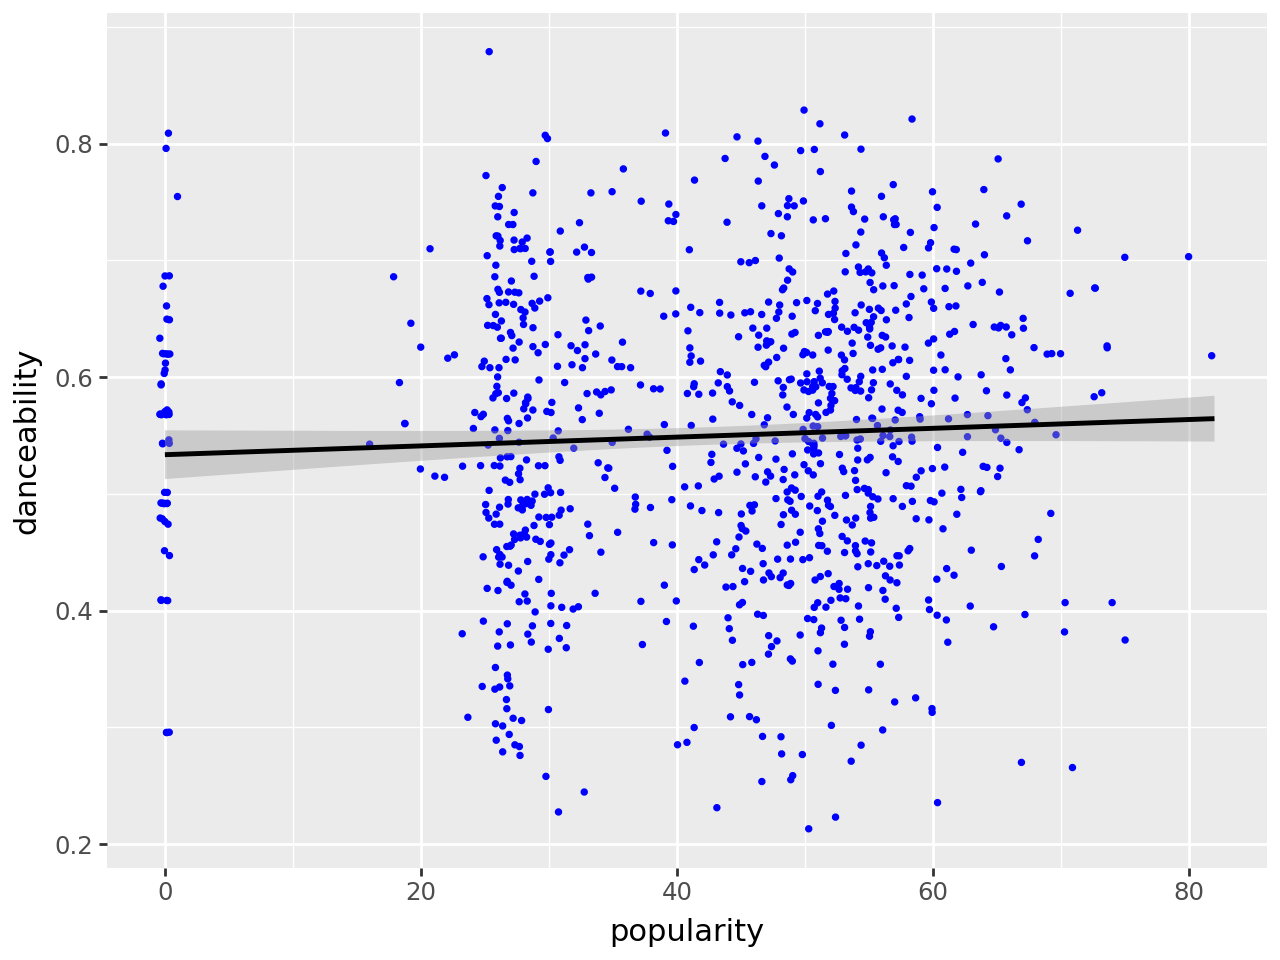

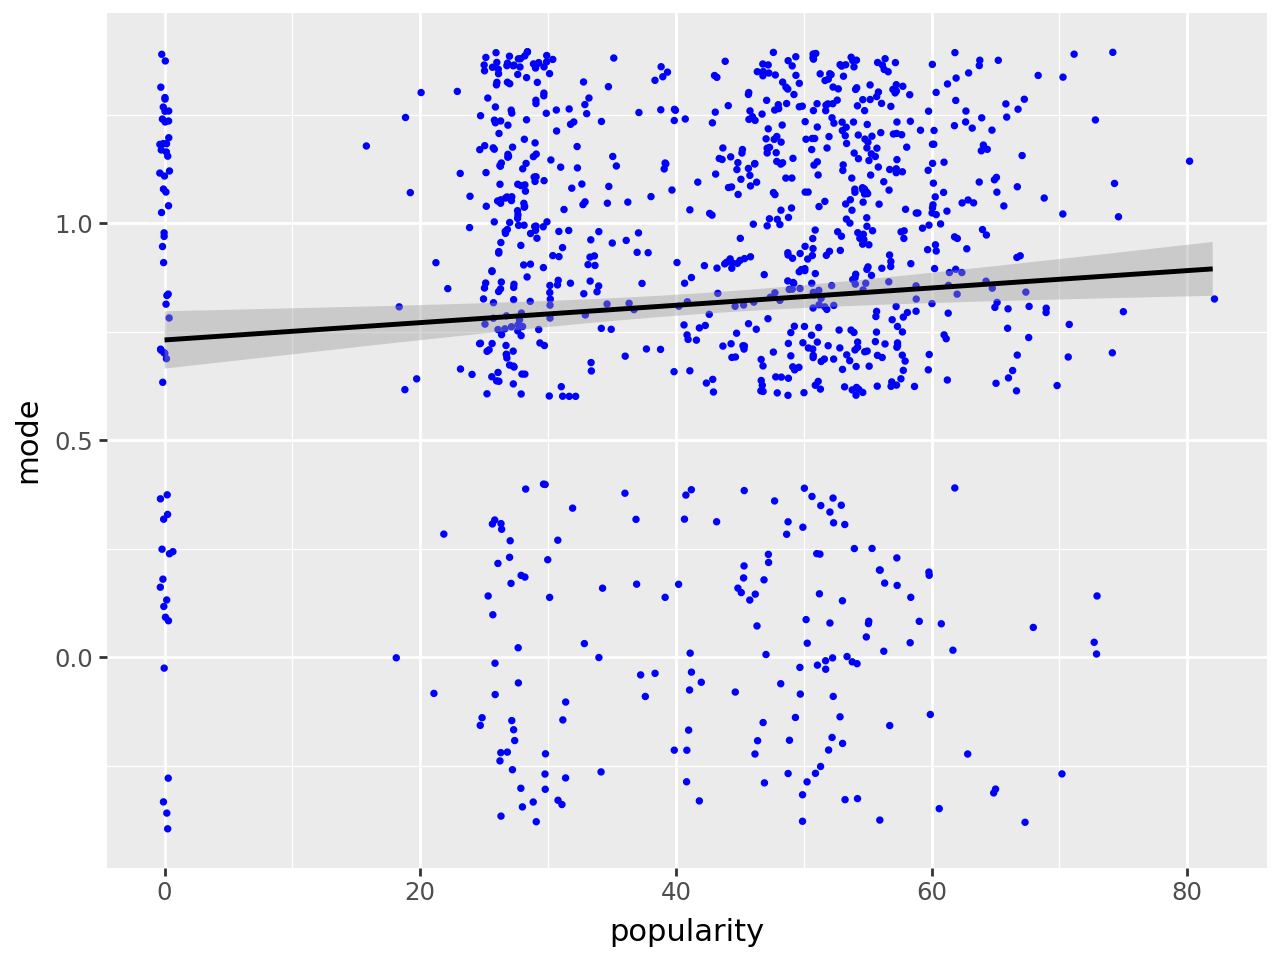

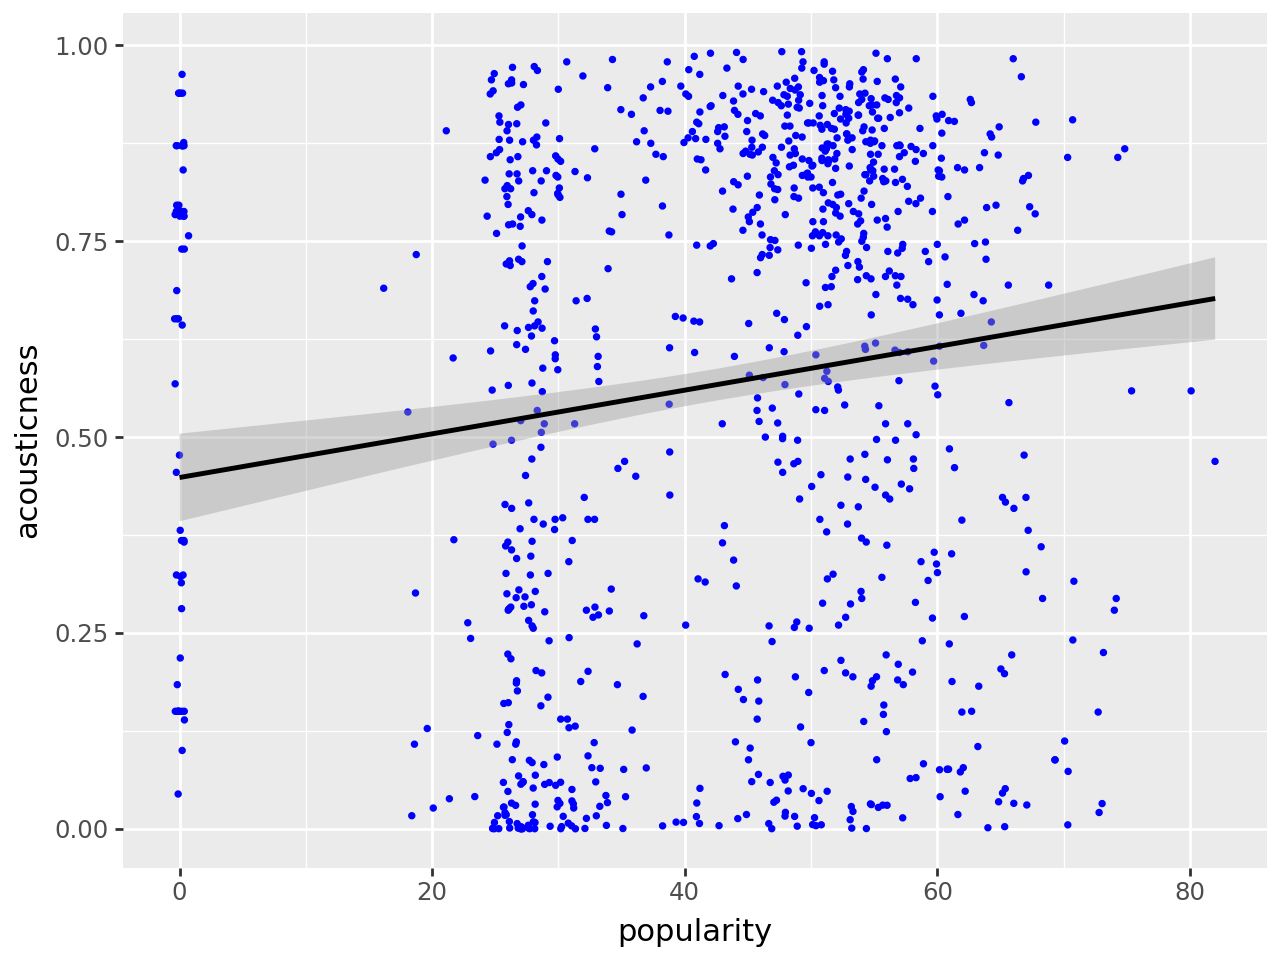

Plot for genre: afrobeat


C:\Users\henrilipping\AppData\Local\anaconda3\Lib\site-packages\plotnine\stats\smoothers.py:345: PlotnineWarning: Confidence intervals are not yet implemented for lowess smoothings.


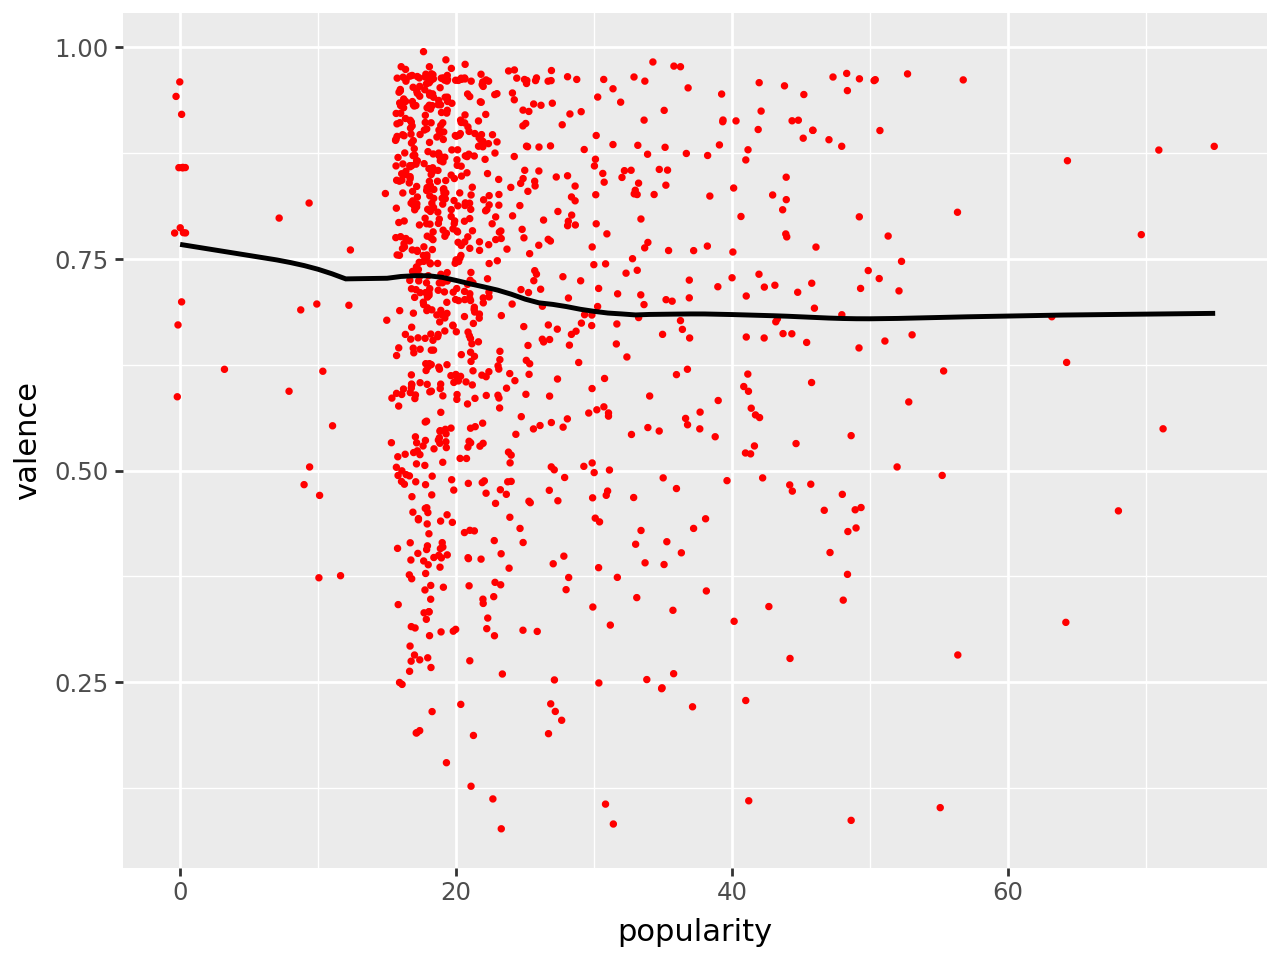

C:\Users\henrilipping\AppData\Local\anaconda3\Lib\site-packages\plotnine\stats\smoothers.py:345: PlotnineWarning: Confidence intervals are not yet implemented for lowess smoothings.


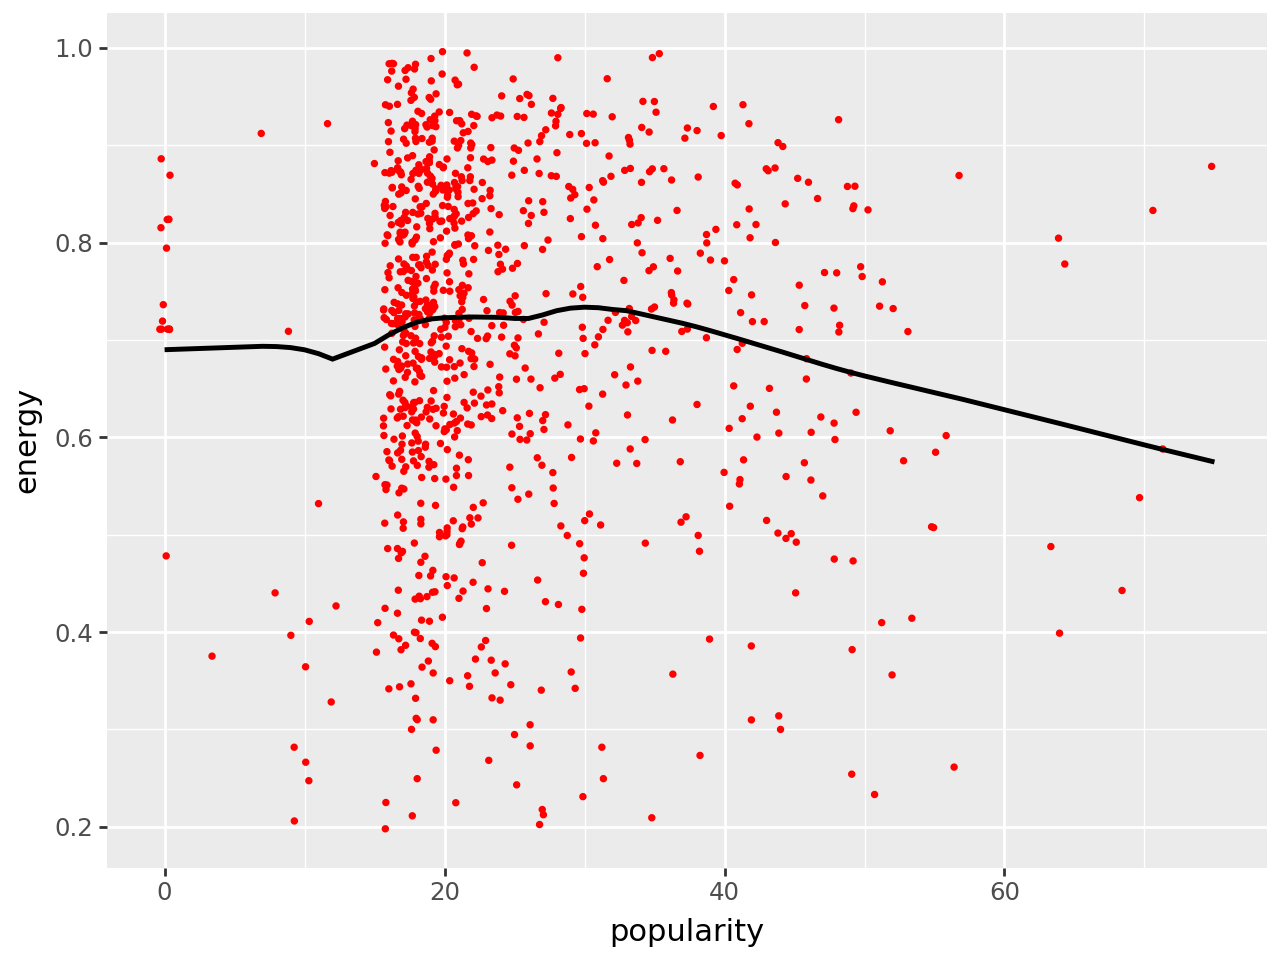

C:\Users\henrilipping\AppData\Local\anaconda3\Lib\site-packages\plotnine\stats\smoothers.py:345: PlotnineWarning: Confidence intervals are not yet implemented for lowess smoothings.


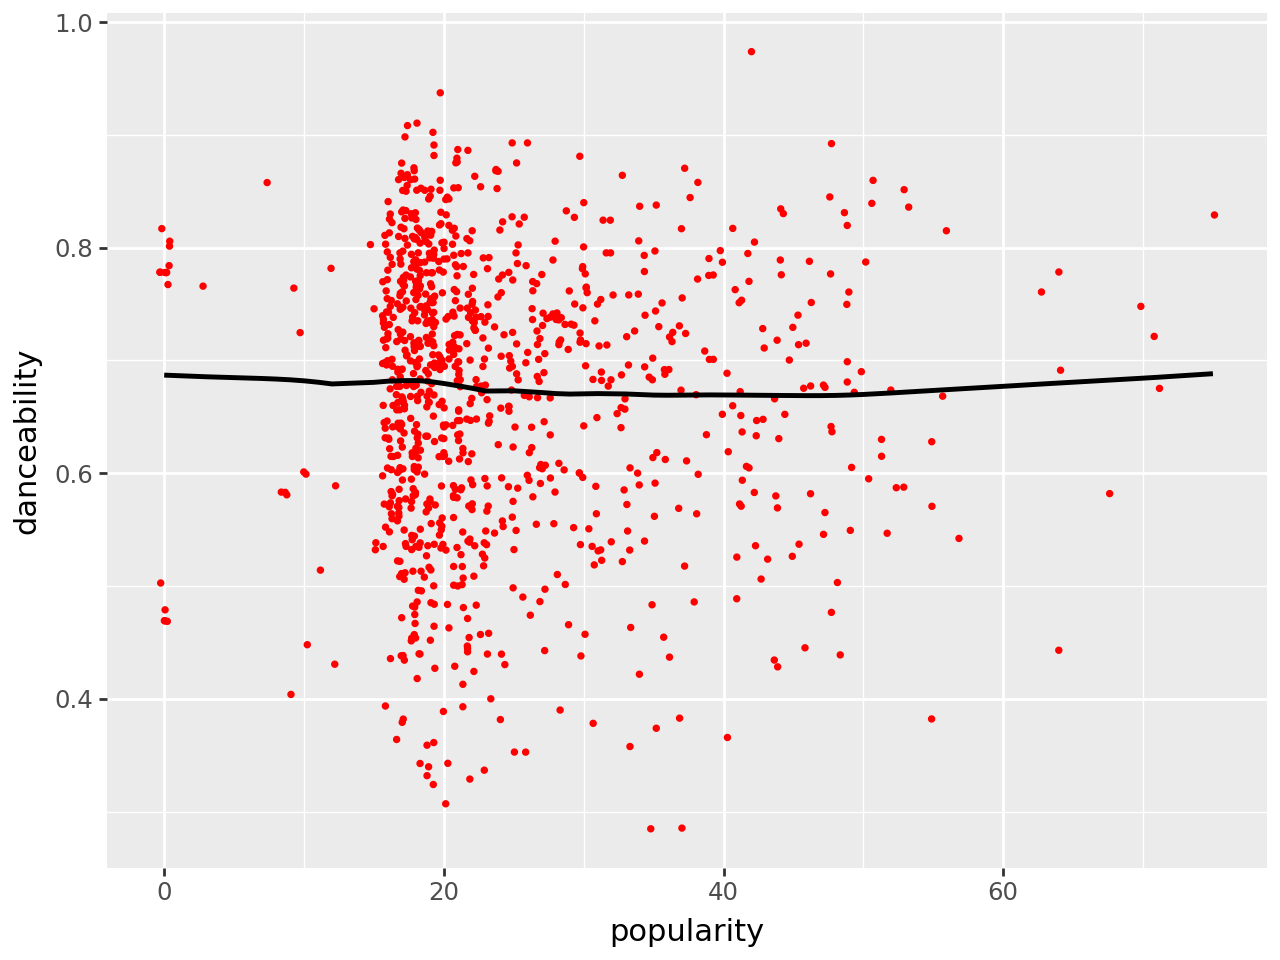

C:\Users\henrilipping\AppData\Local\anaconda3\Lib\site-packages\plotnine\stats\smoothers.py:345: PlotnineWarning: Confidence intervals are not yet implemented for lowess smoothings.


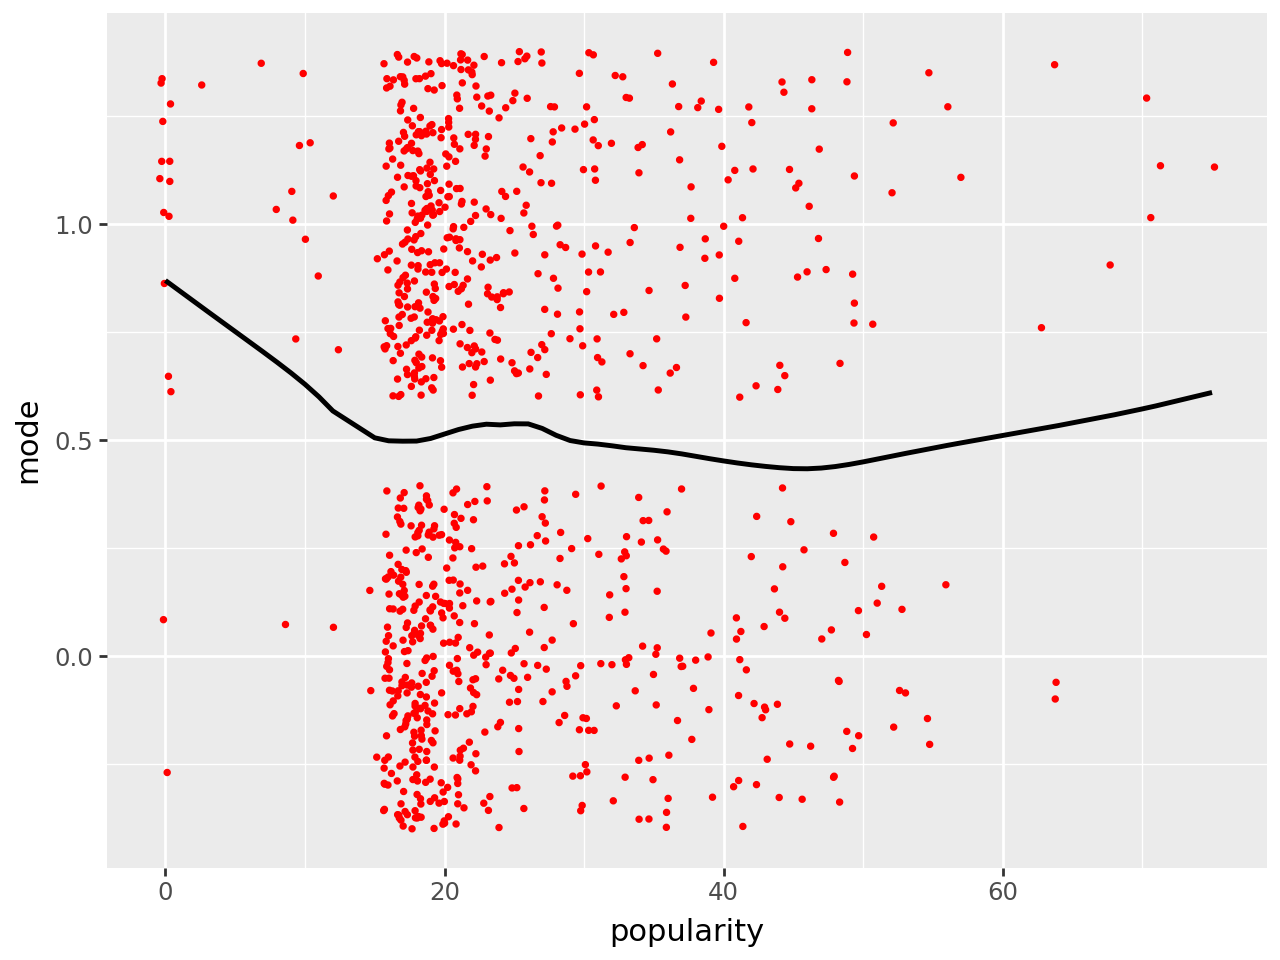

C:\Users\henrilipping\AppData\Local\anaconda3\Lib\site-packages\plotnine\stats\smoothers.py:345: PlotnineWarning: Confidence intervals are not yet implemented for lowess smoothings.


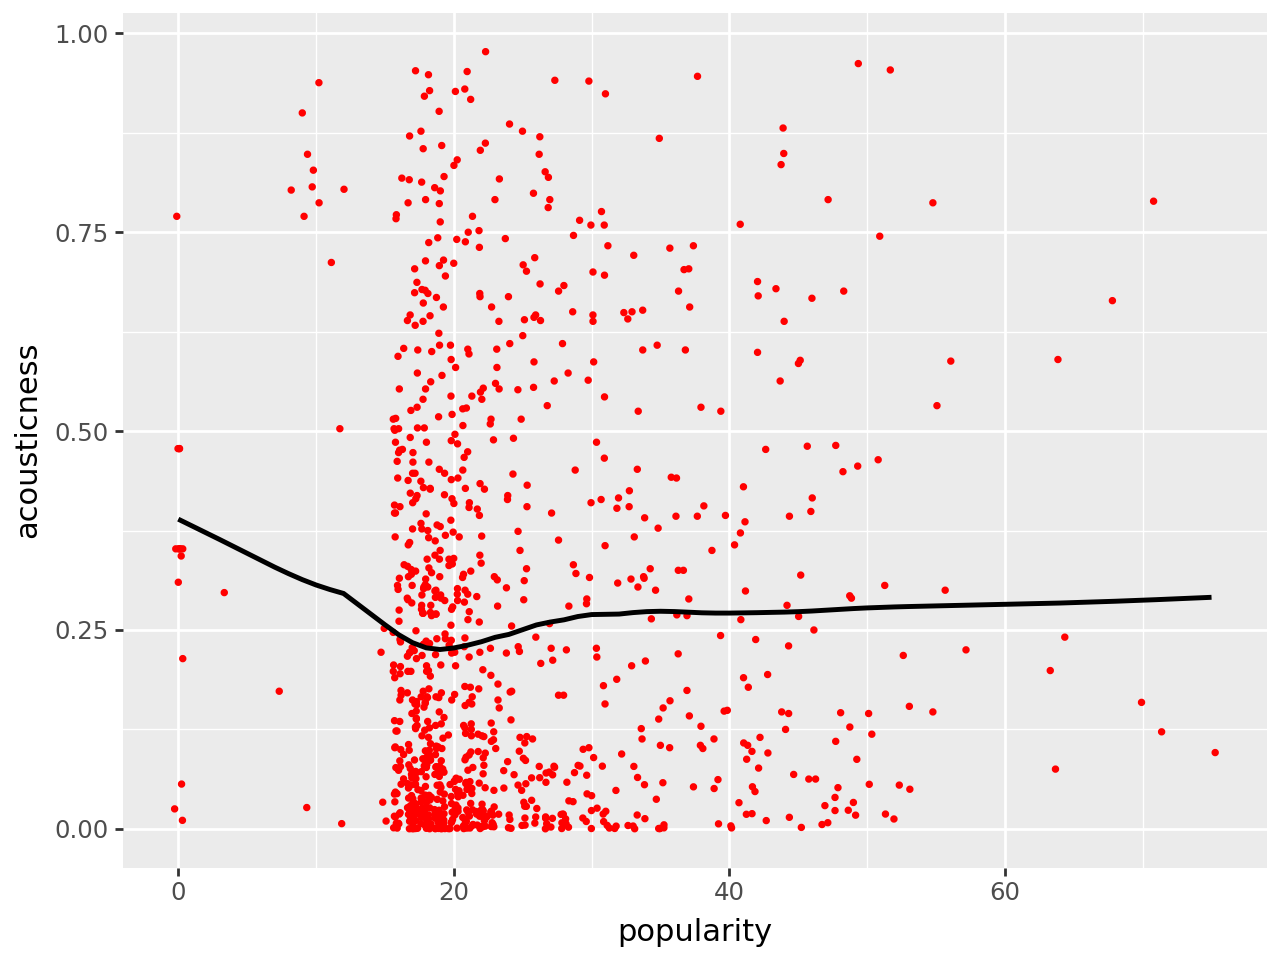

Plot for genre: alt-rock


C:\Users\henrilipping\AppData\Local\anaconda3\Lib\site-packages\plotnine\stats\smoothers.py:345: PlotnineWarning: Confidence intervals are not yet implemented for lowess smoothings.


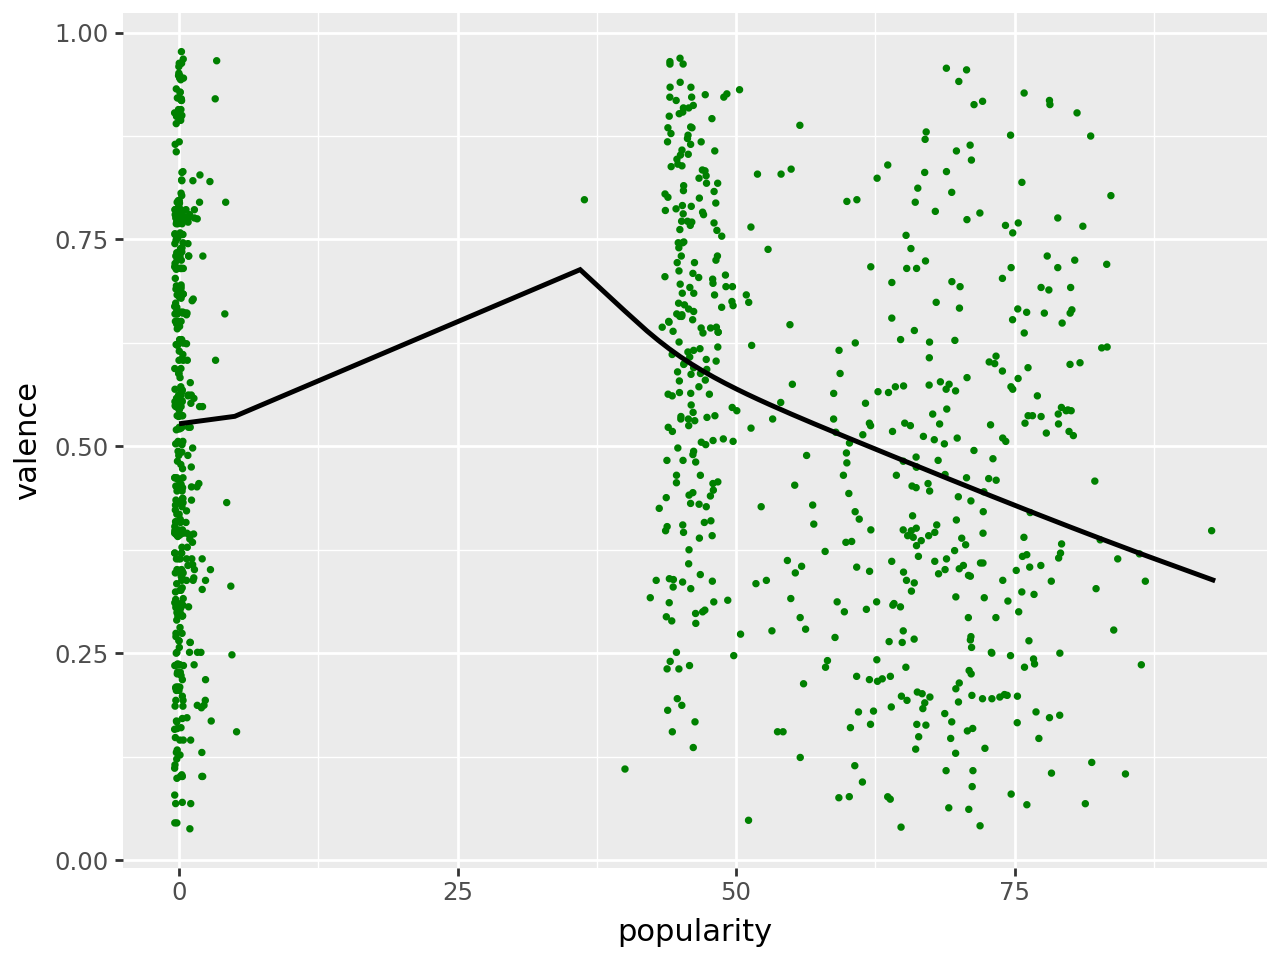

C:\Users\henrilipping\AppData\Local\anaconda3\Lib\site-packages\plotnine\stats\smoothers.py:345: PlotnineWarning: Confidence intervals are not yet implemented for lowess smoothings.


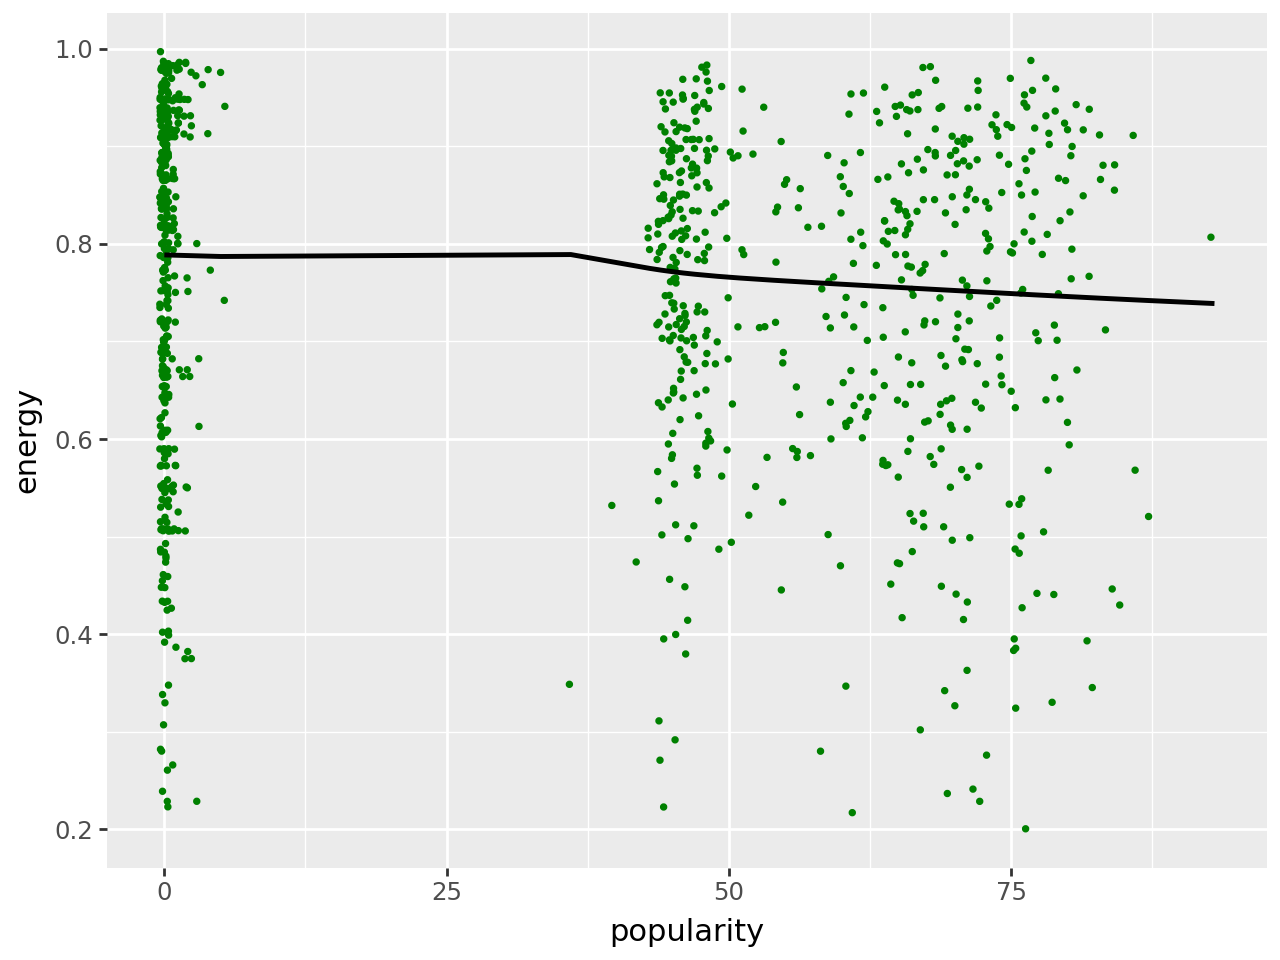

C:\Users\henrilipping\AppData\Local\anaconda3\Lib\site-packages\plotnine\stats\smoothers.py:345: PlotnineWarning: Confidence intervals are not yet implemented for lowess smoothings.


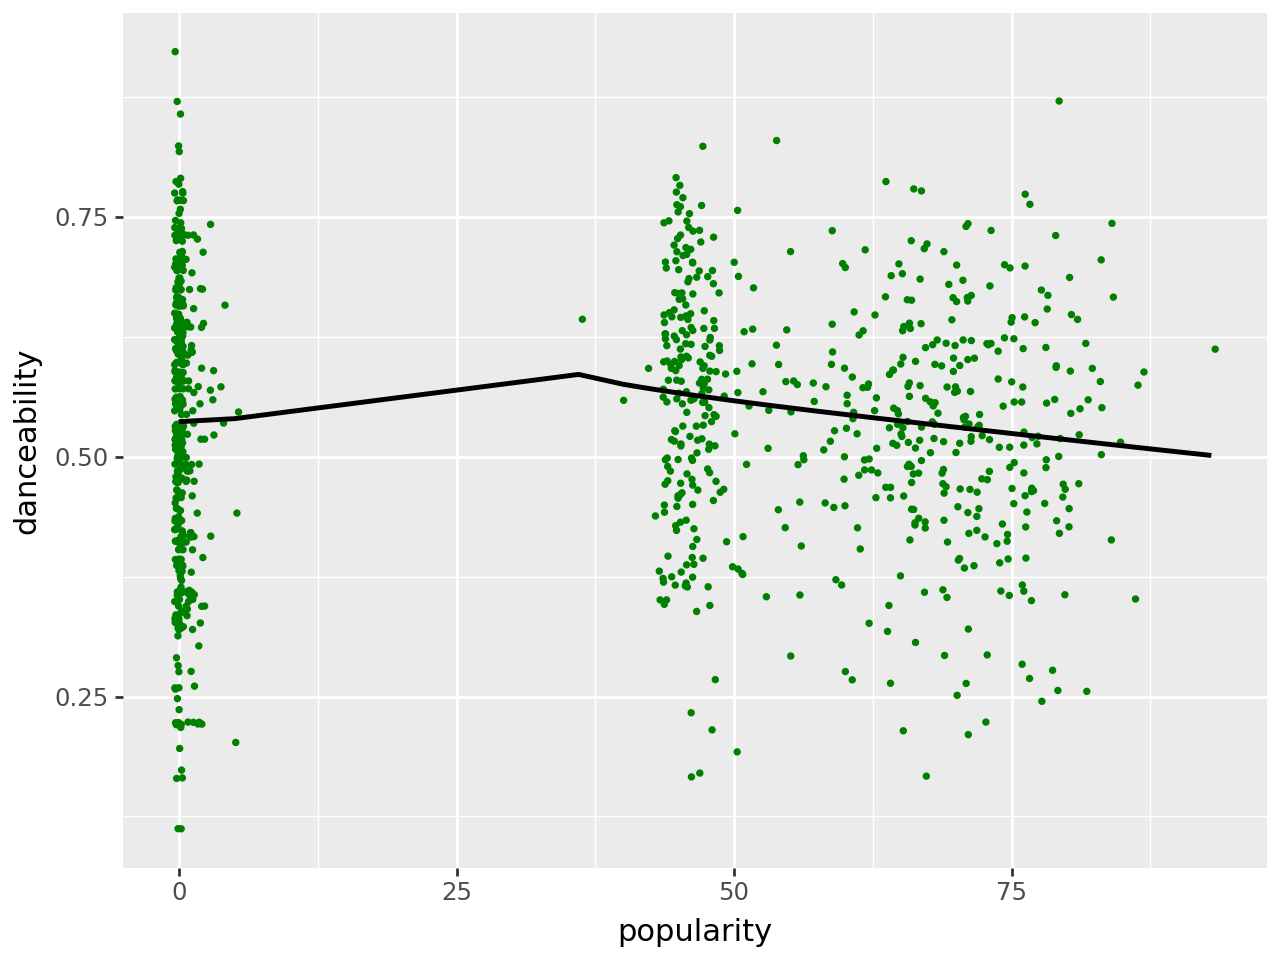

C:\Users\henrilipping\AppData\Local\anaconda3\Lib\site-packages\plotnine\stats\smoothers.py:345: PlotnineWarning: Confidence intervals are not yet implemented for lowess smoothings.


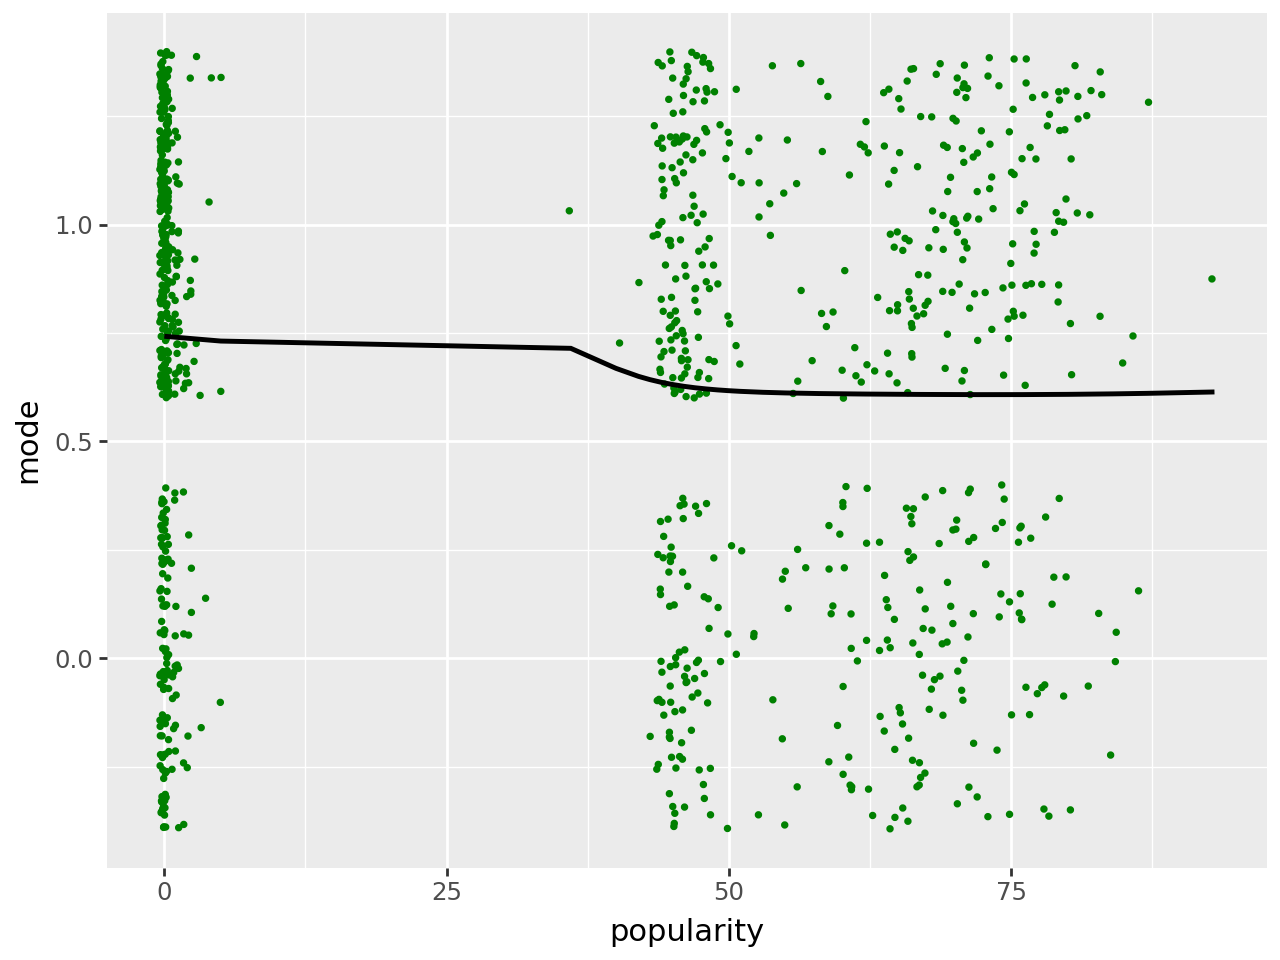

C:\Users\henrilipping\AppData\Local\anaconda3\Lib\site-packages\plotnine\stats\smoothers.py:345: PlotnineWarning: Confidence intervals are not yet implemented for lowess smoothings.


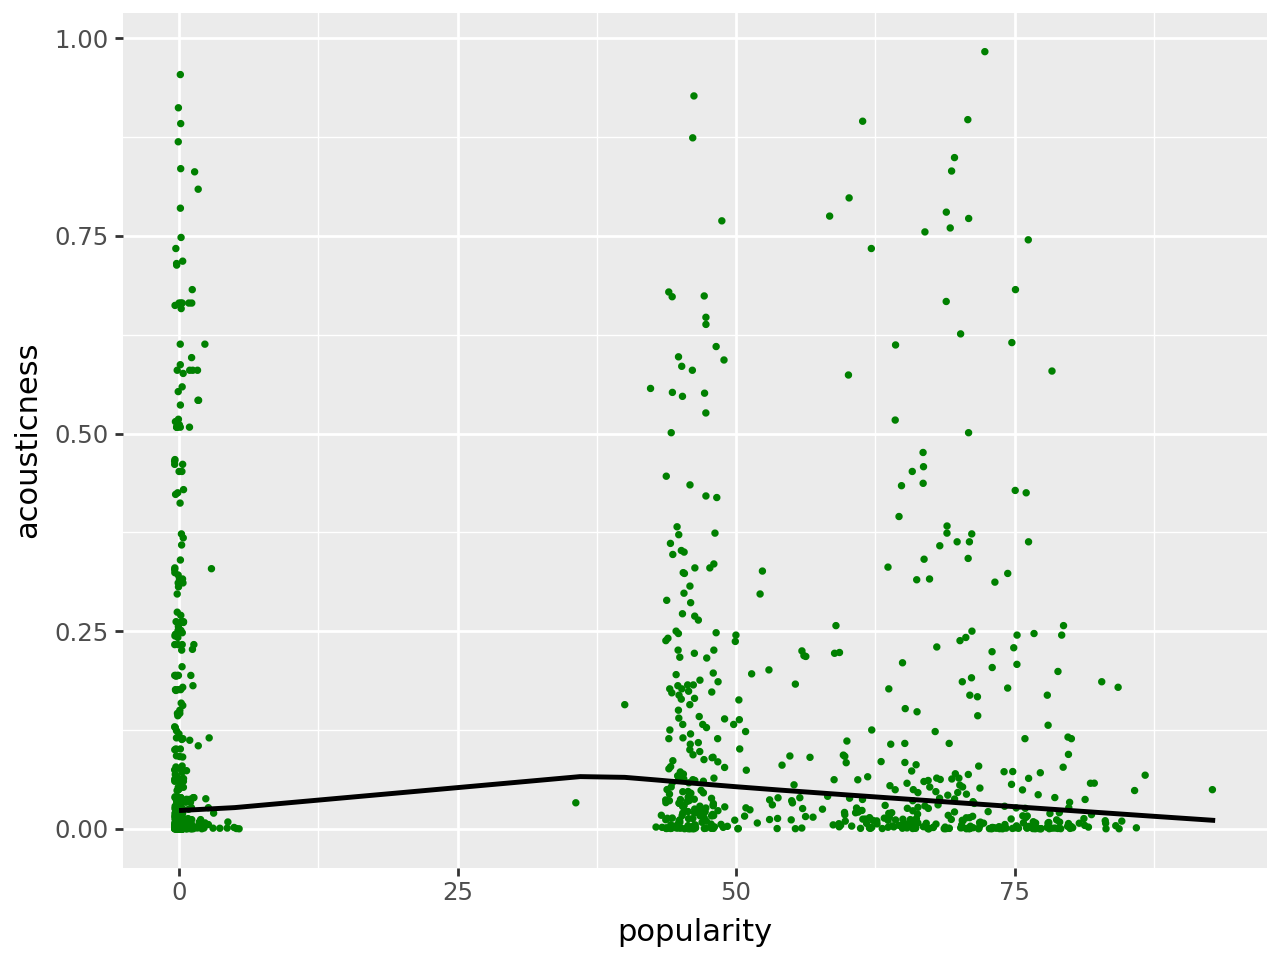

Plot for genre: ambient


C:\Users\henrilipping\AppData\Local\anaconda3\Lib\site-packages\plotnine\stats\smoothers.py:345: PlotnineWarning: Confidence intervals are not yet implemented for lowess smoothings.


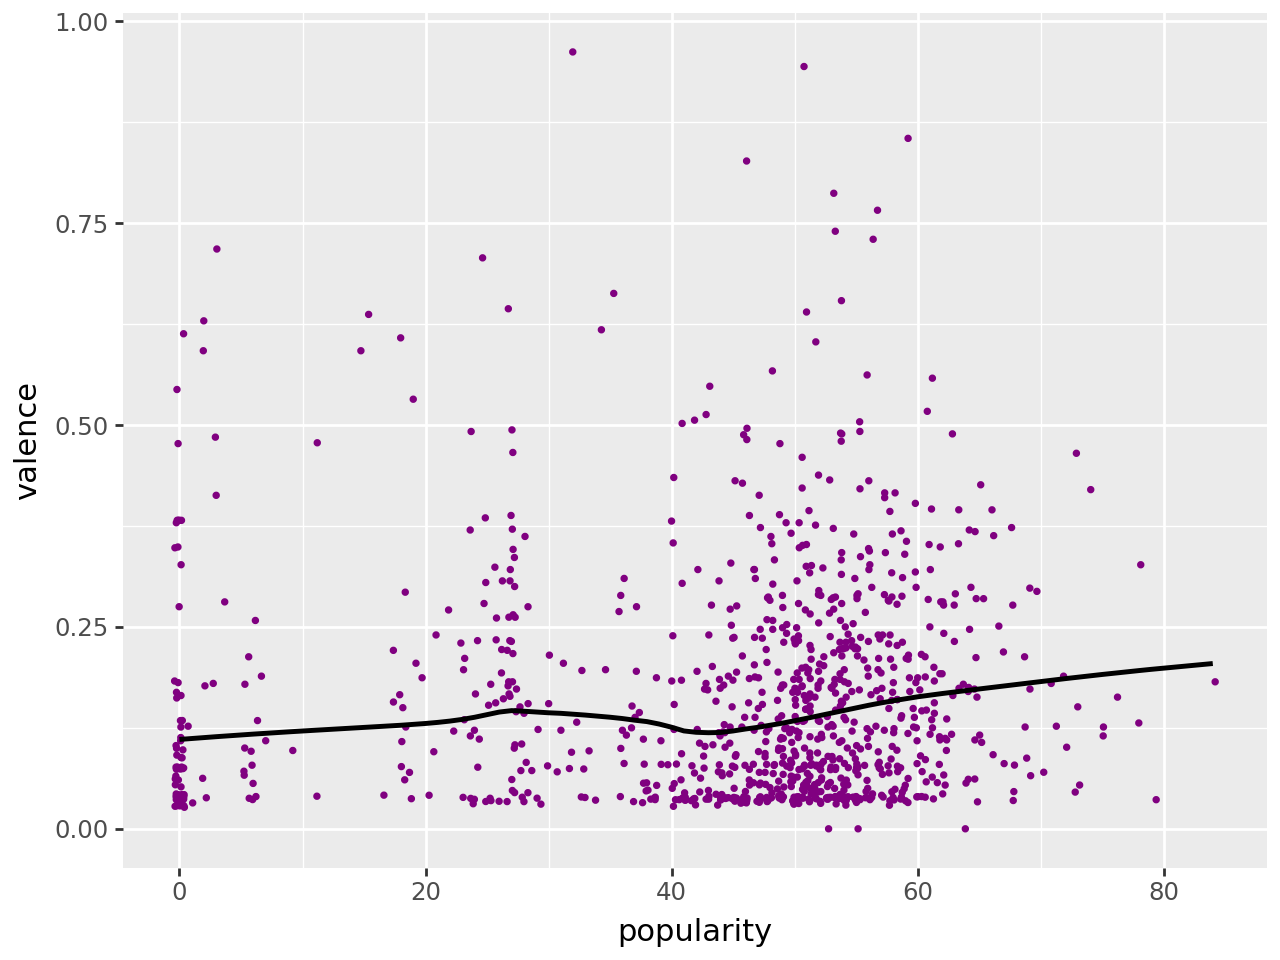

C:\Users\henrilipping\AppData\Local\anaconda3\Lib\site-packages\plotnine\stats\smoothers.py:345: PlotnineWarning: Confidence intervals are not yet implemented for lowess smoothings.


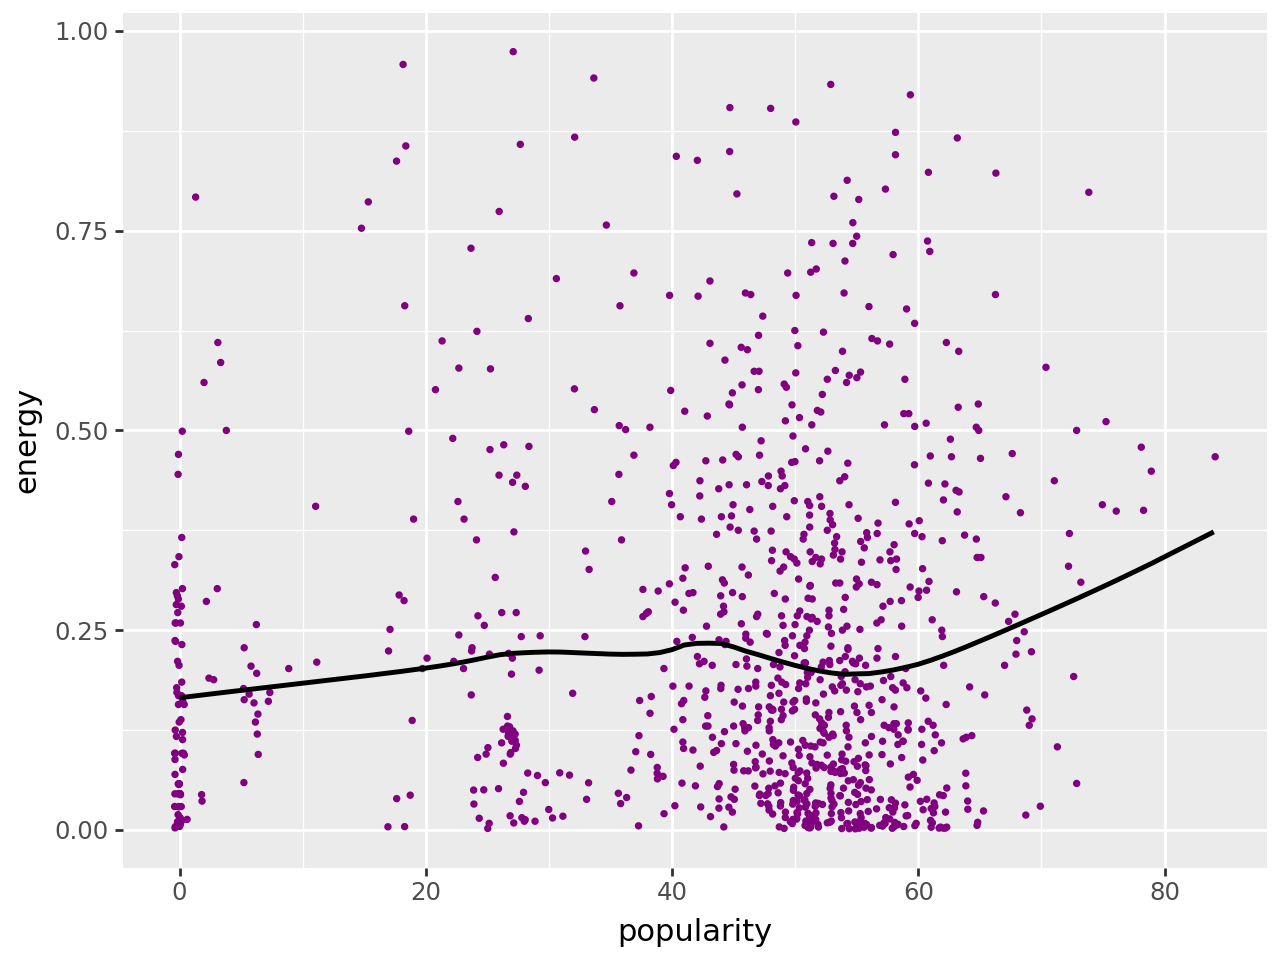

C:\Users\henrilipping\AppData\Local\anaconda3\Lib\site-packages\plotnine\stats\smoothers.py:345: PlotnineWarning: Confidence intervals are not yet implemented for lowess smoothings.


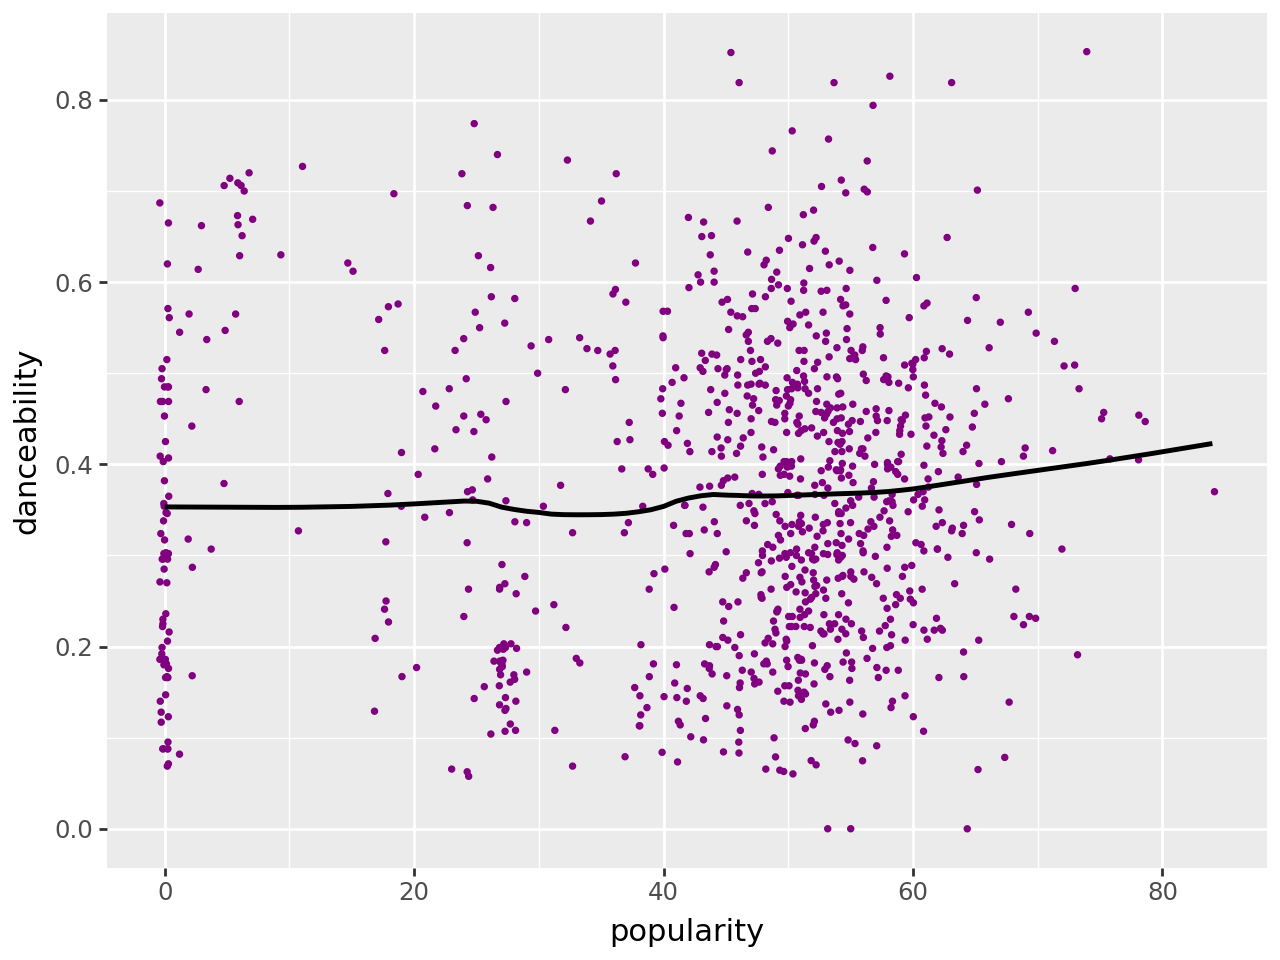

C:\Users\henrilipping\AppData\Local\anaconda3\Lib\site-packages\plotnine\stats\smoothers.py:345: PlotnineWarning: Confidence intervals are not yet implemented for lowess smoothings.


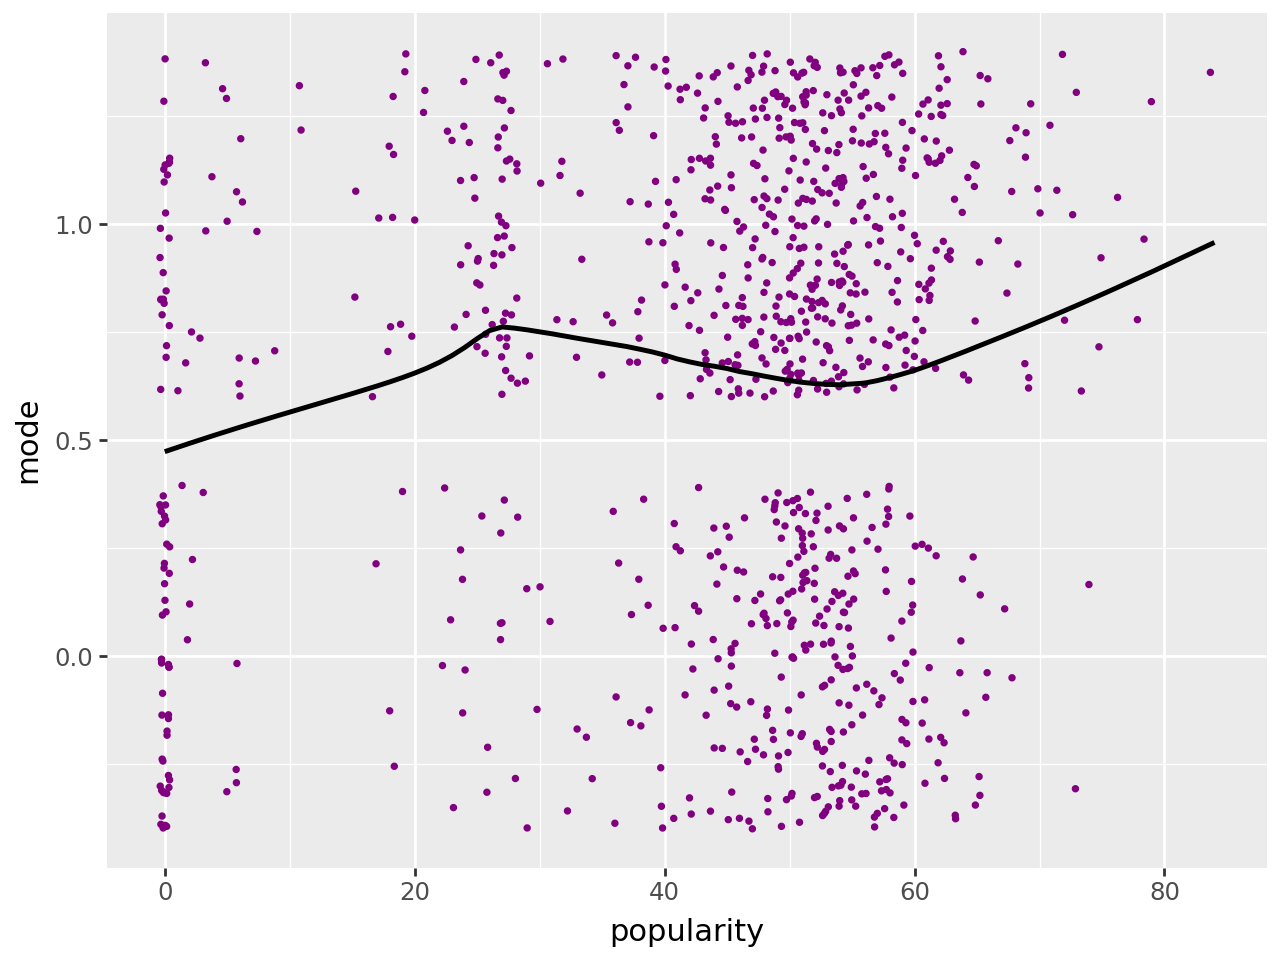

C:\Users\henrilipping\AppData\Local\anaconda3\Lib\site-packages\plotnine\stats\smoothers.py:345: PlotnineWarning: Confidence intervals are not yet implemented for lowess smoothings.


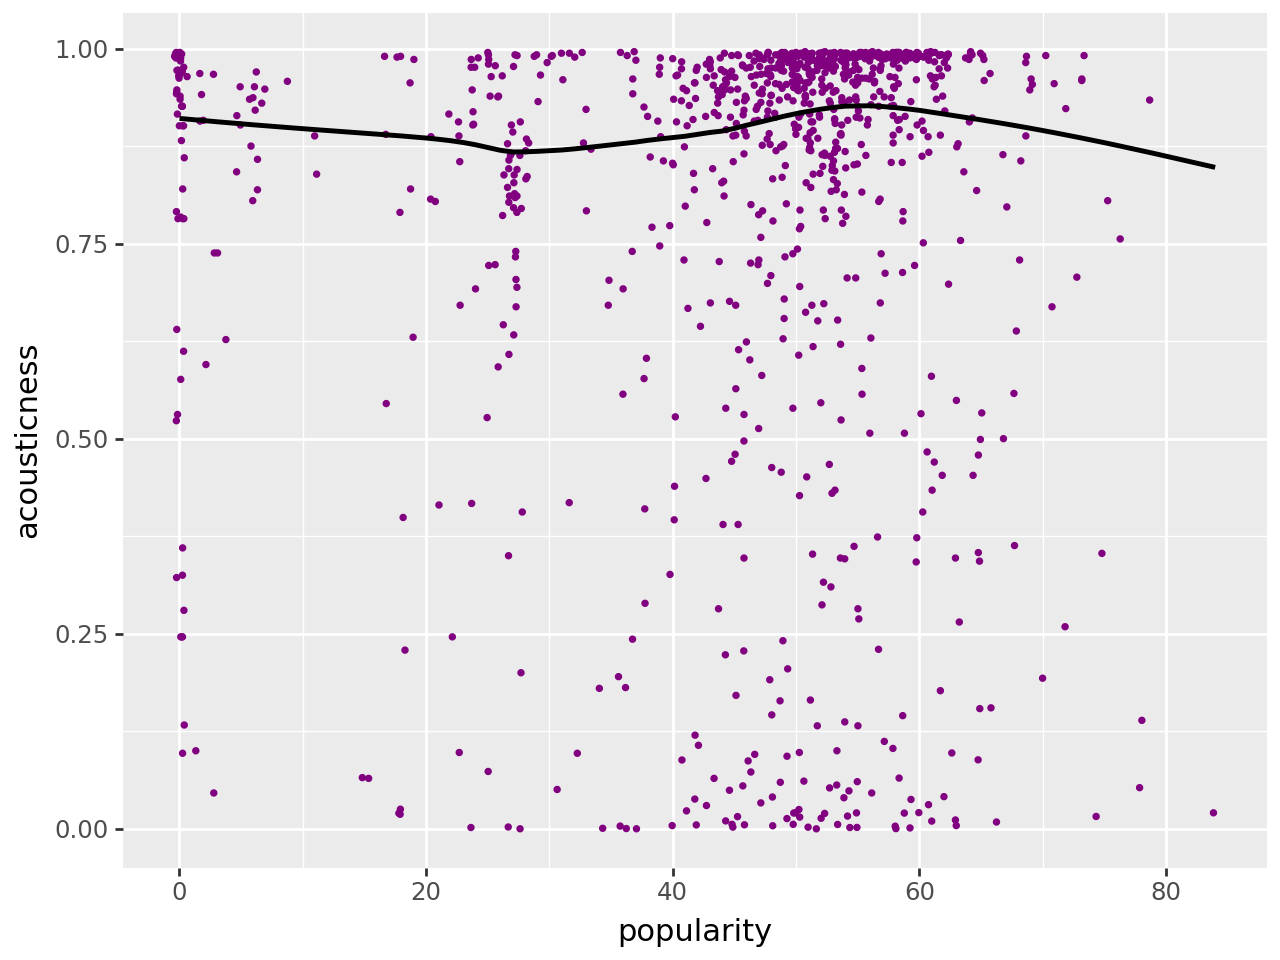

Plot for genre: cantopop


C:\Users\henrilipping\AppData\Local\anaconda3\Lib\site-packages\plotnine\stats\smoothers.py:345: PlotnineWarning: Confidence intervals are not yet implemented for lowess smoothings.


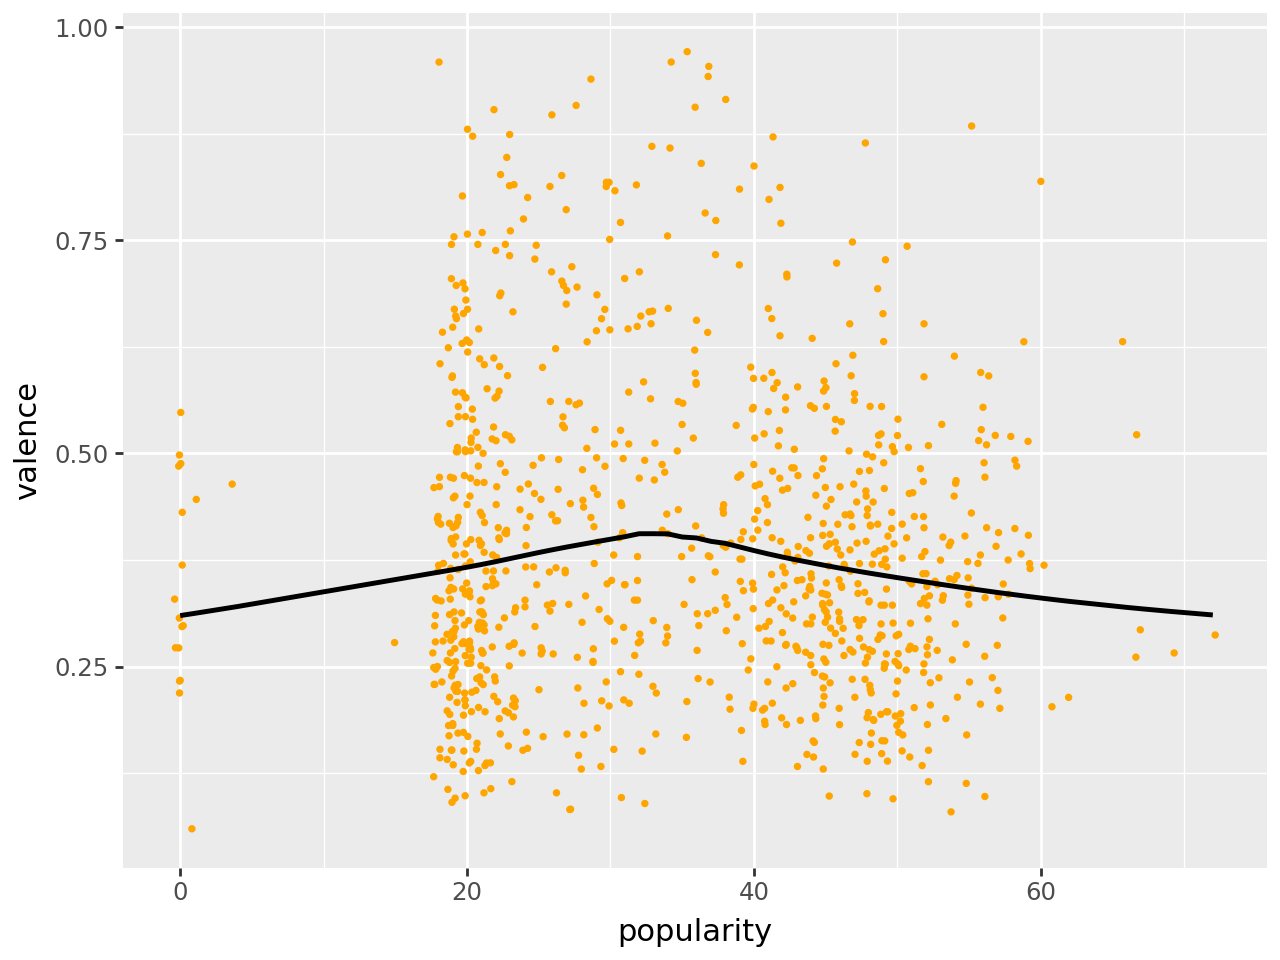

C:\Users\henrilipping\AppData\Local\anaconda3\Lib\site-packages\plotnine\stats\smoothers.py:345: PlotnineWarning: Confidence intervals are not yet implemented for lowess smoothings.


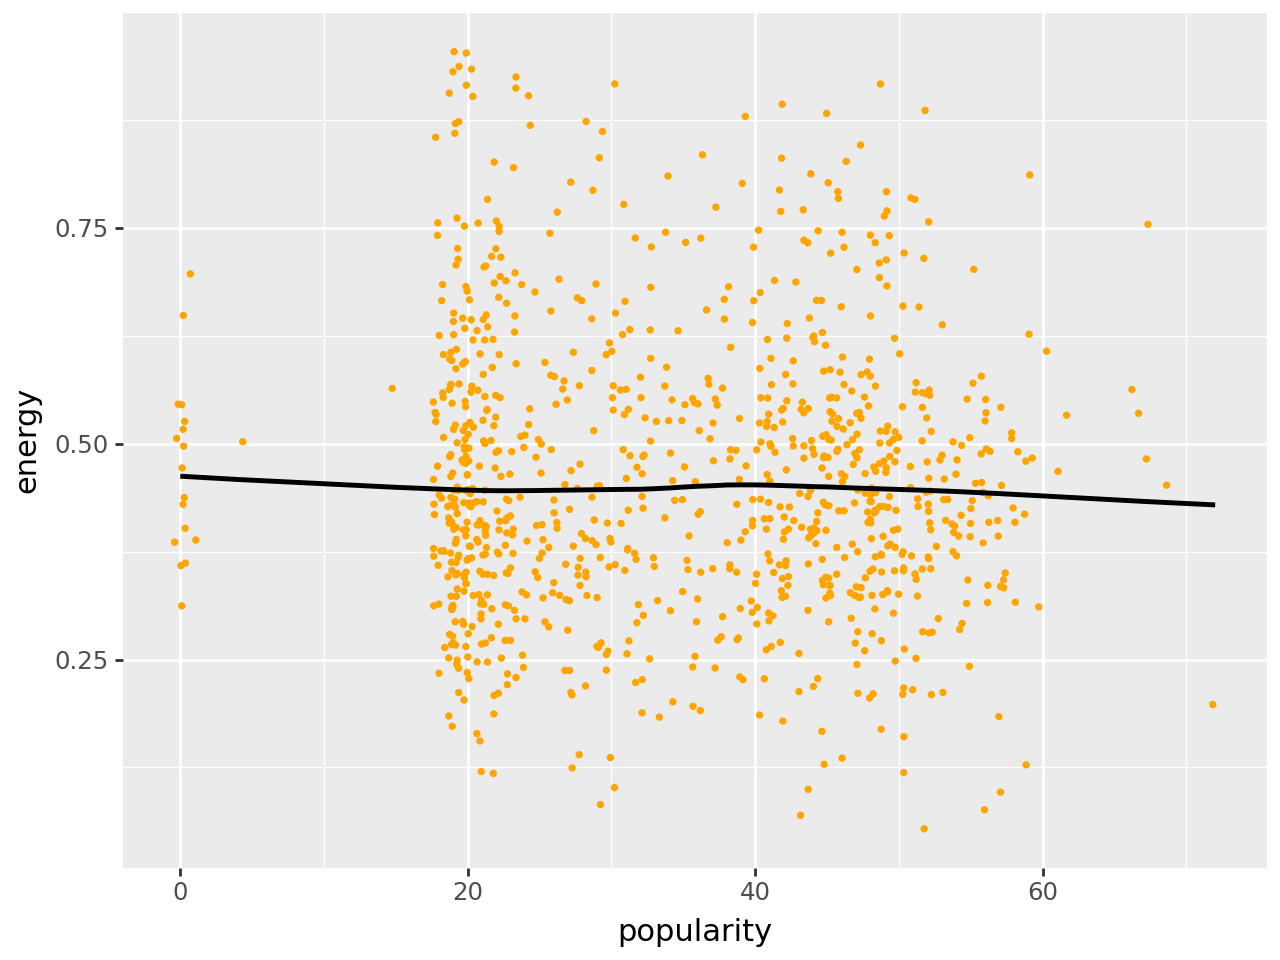

C:\Users\henrilipping\AppData\Local\anaconda3\Lib\site-packages\plotnine\stats\smoothers.py:345: PlotnineWarning: Confidence intervals are not yet implemented for lowess smoothings.


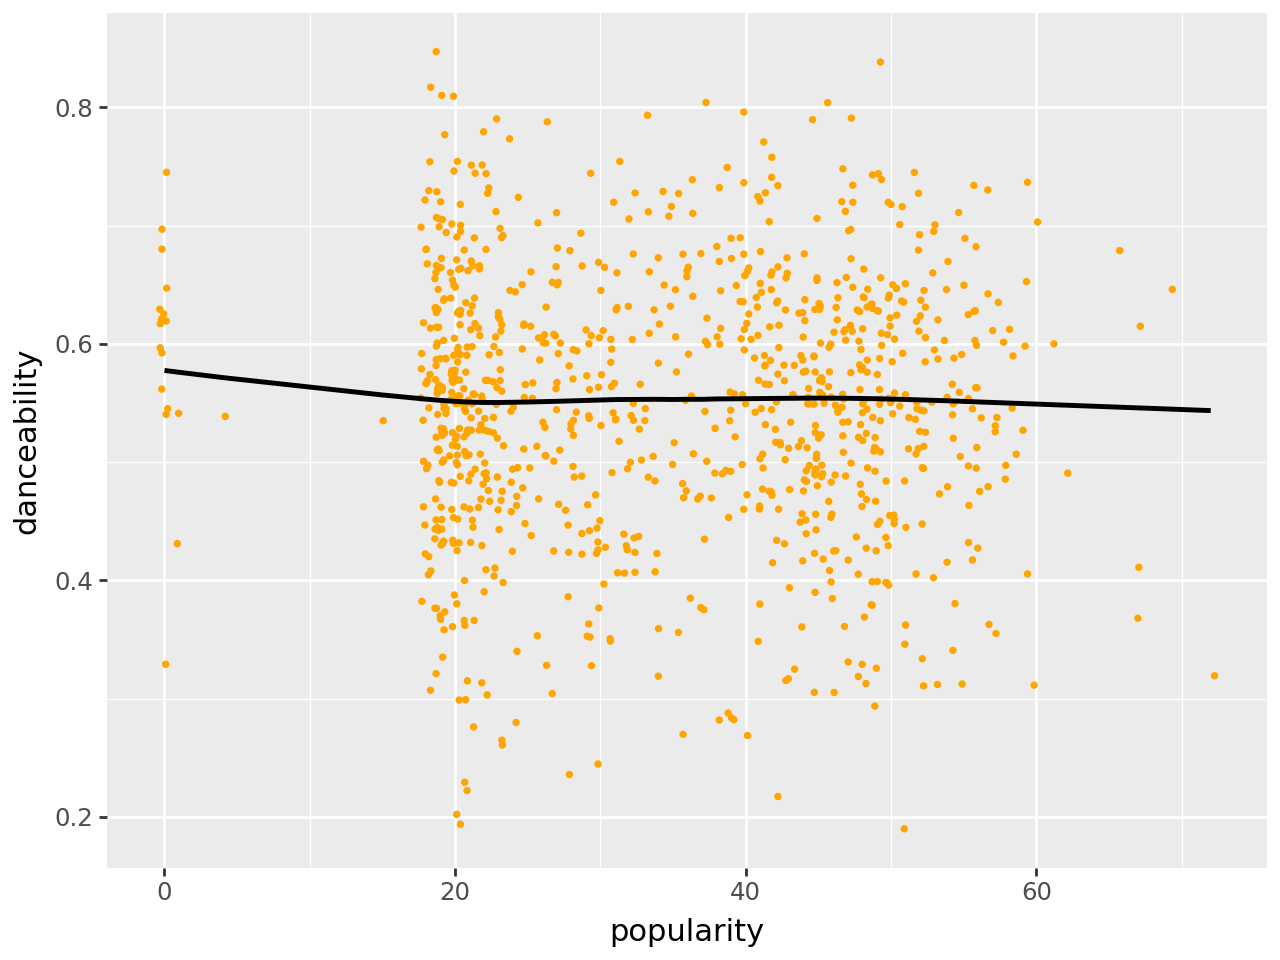

C:\Users\henrilipping\AppData\Local\anaconda3\Lib\site-packages\plotnine\stats\smoothers.py:345: PlotnineWarning: Confidence intervals are not yet implemented for lowess smoothings.


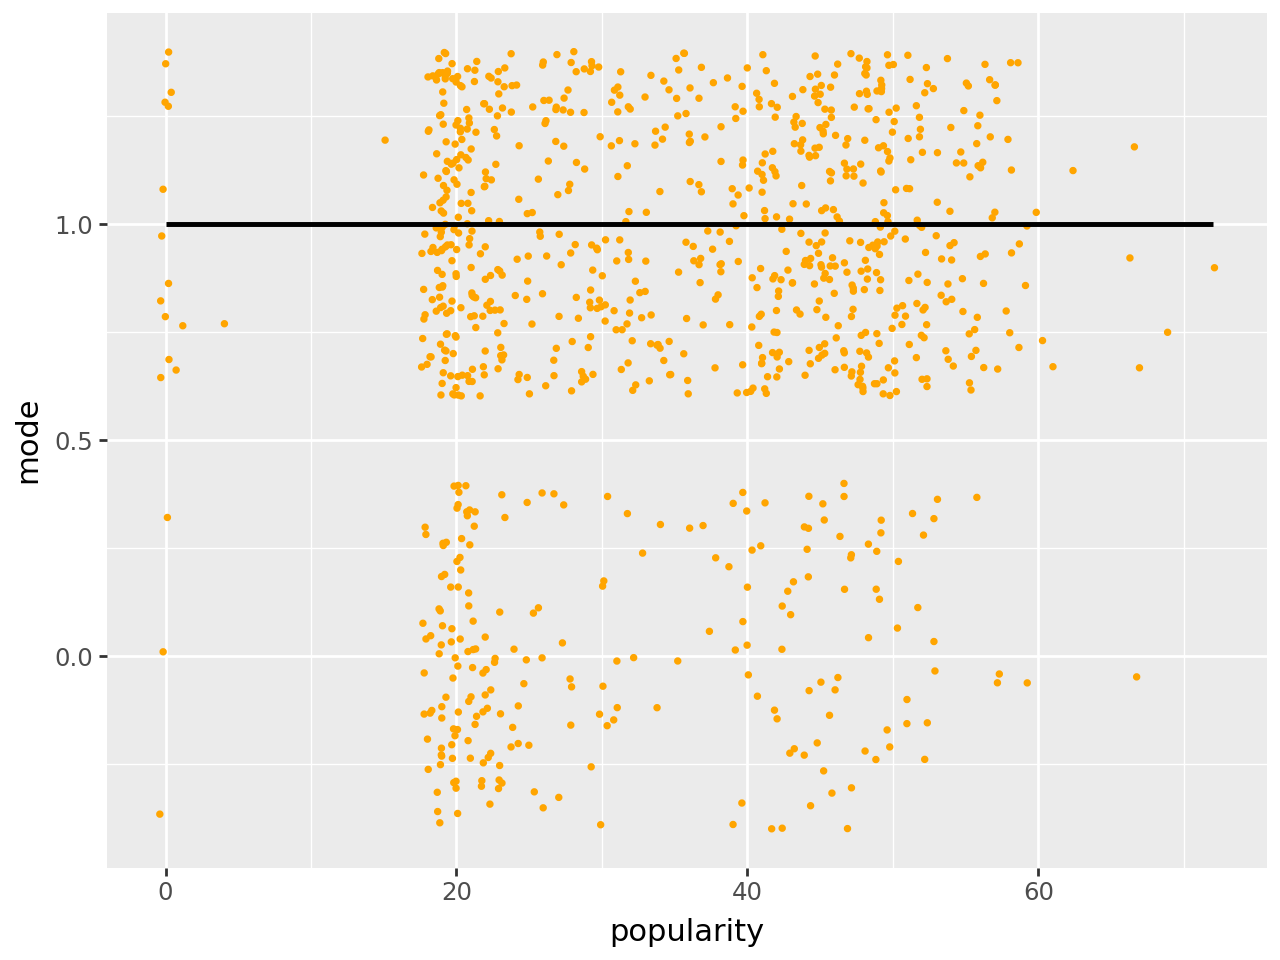

C:\Users\henrilipping\AppData\Local\anaconda3\Lib\site-packages\plotnine\stats\smoothers.py:345: PlotnineWarning: Confidence intervals are not yet implemented for lowess smoothings.


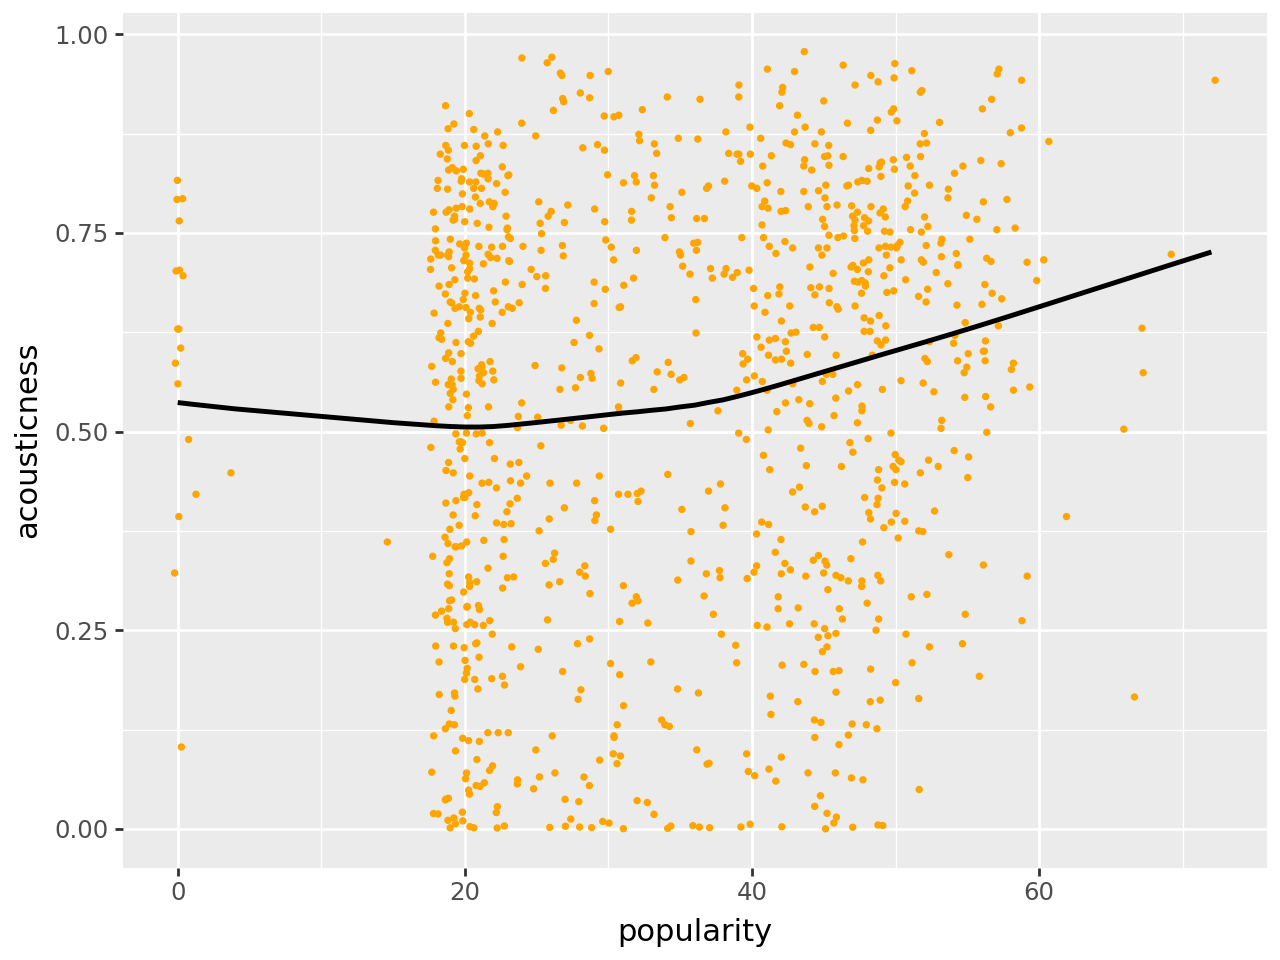

In [5]:
#method to find multiple graphs given 5 genres and attributes.
top5 = data['track_genre'].value_counts().head(5)
colors = ["blue", "red", "green", "purple", "orange"]
metadata = ["valence", "energy", "danceability", "mode", "acousticness"]

for i in range(5):
    genre = top5.index[i]
    data_copy = data[data["track_genre"] == genre]
    print(f"Plot for genre: {genre}")
    for j in range(5):
        display(
        p9.ggplot(
        data = data_copy,
        mapping = p9.aes(x='popularity', y=metadata[j]))+
        p9.geom_point(color=colors[i], position="jitter", size=0.5) + p9.geom_smooth()
        )

Method to predict using RandomForest and ALL genres, returns sorted DataFrame with accuracy and MSE for each genre. 
Code may run for up to a minute.

In [6]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_squared_error
unique_genres_list = data["track_genre"].unique().tolist()
#This now uses 4 bins to cut the popularity into 4 groups. Now the model doesnt have to predict 101 values but only 4.
data["pop_bin"] = pd.qcut(data["popularity"], q=4, labels=["Very Low", "Low", "High", "Very High"])#uus tulp mis splitb popularity põhjal, ehk cutoff 4'ga
def prediction(data, genres):
    results_df = pd.DataFrame({'genre': ['genre_name'], 'accuracy': ["acc"], "MSE": ["mse"]})
    for i in range(1,len(genres)):
        data_copy = data[data["track_genre"] == genres[i]]
        X = data_copy.drop("popularity", axis=1)  
        X = X.drop("pop_bin", axis=1)
        X = X.drop("track_id", axis=1)
        X = X.drop("artists", axis=1)
        X = X.drop("album_name", axis=1)
        X = X.drop("track_name", axis=1)
        X = X.drop("track_genre", axis=1)
        #y = data_copy["popularity"]
        y = data_copy["pop_bin"] #ennustame nüüd uud tulpa, mitte popularity.
        X_train, X_test, y_train, y_test = train_test_split(X,y, random_state=1, test_size=0.3)
        rf = RandomForestClassifier(n_estimators=200,max_depth=4, random_state=2).fit(X_train, y_train)
        pred = rf.predict(X_test)
        acc = accuracy_score(y_test, pred)
        #mse = mean_squared_error(y_test, pred)
        #mse vist ei tööta millegipärast
        #ikka kasutab Classifier
        results_df.loc[len(results_df)] = [genres[i], acc, 0]
    results_df = results_df.drop(0, axis=0).reset_index(drop=True)
    results_df_sorted = results_df.sort_values(by='accuracy', ascending=False)
    return results_df_sorted


result = prediction(data, unique_genres_list)
print(result) 
print("Average accuracy: " + str(result['accuracy'].mean()))
#print(result[result["genre"] == "jazz"])
#print("Average MSE: " + str(result['MSE'].mean()))

         genre  accuracy MSE
58     iranian  0.996633   0
39      gospel   0.99505   0
34       forro  0.953333   0
73         mpb  0.952991   0
79    pop-film  0.942857   0
..         ...       ...  ..
13    children  0.423208   0
11    cantopop      0.42   0
105  synth-pop   0.40873   0
103      study  0.406667   0
109   trip-hop  0.323529   0

[112 rows x 3 columns]
Average accuracy: 0.6747512082967776


Next we built two function that predicts a song popularity based on numberi_columns, song_gender and song_data. First one predicts with pop_bin and second one with popularity.

In [155]:
def predict_song_popularity(numeric_columns, song_genre, song_data):
    # Takes only predicted song gender
    data_copy = data[data["track_genre"] == song_genre]

    # Takes columns where are only numeric values
    X_full = data_copy[numeric_columns]
    y_full = data_copy["pop_bin"]
    
    X_train_full, X_test_full, y_train_full, y_test_full = train_test_split(X_full, y_full, test_size=0.2, random_state=42)
    
    model = RandomForestClassifier().fit(X_train_full, y_train_full)

    # Create a one-row DataFrame from song_data
    df_song = pd.DataFrame([song_data])
    prediction = model.predict(df_song)[0]
    
    print("Predicted popularity (with pop_bin):", prediction)

In [156]:
def predict_song_popularity2(numeric_columns, song_genre, song_data):
    # Takes only predicted song gender
    data_copy = data[data["track_genre"] == song_genre]

    # Takes columns where are only numeric values
    X_full = data_copy[numeric_columns]
    y_full = data_copy["popularity"]
    
    X_train_full, X_test_full, y_train_full, y_test_full = train_test_split(X_full, y_full, test_size=0.2, random_state=42)
    
    model = RandomForestRegressor().fit(X_train_full, y_train_full)

    # Create a one-row DataFrame from song_data
    df_song = pd.DataFrame([song_data])
    prediction = model.predict(df_song)[0]
    
    print("Predicted popularity (with popularity):", prediction)

Now we give value to numberic_columns

In [145]:
# Numeric column values
numeric_columns = ["duration_ms", "explicit", "danceability", "energy", "key", "loudness", "mode", "speechiness",  
                    "acousticness", "instrumentalness", "liveness", "valence", "tempo", "time_signature"]

Next we can select one song with his gender and data and call out function what we did pefore and get a this song popularity group.

In [157]:
# Predicted song data 0
song_genre = "gospel"
song_data = {
    "duration_ms": 163320,
    "explicit": 0,
    "danceability": 0.626,
    "energy": 0.422,
    "key": 9,
    "loudness": -13.618,
    "mode": 1,
    "speechiness": 0.0492,
    "acousticness": 0.246,
    "instrumentalness": 0.0,
    "liveness": 0.342,
    "valence": 0.661,
    "tempo": 151.466,
    "time_signature": 4
}

# Calls out function to predict song popularity
print("Popularity should be: 0")
predict_song_popularity(numeric_columns, song_genre, song_data)
predict_song_popularity2(numeric_columns, song_genre, song_data)

Popularity should be: 0
Predicted popularity (with pop_bin): High
Predicted popularity (with popularity): 38.86


In [158]:
# Predicted song data 42
song_genre = "gospel"
song_data = {
    "duration_ms": 244273,
    "explicit": 0,
    "danceability": 0.493,
    "energy": 0.589,
    "key": 3,
    "loudness": -5.857,
    "mode": 0,
    "speechiness": 0.0377,
    "acousticness": 0.327,
    "instrumentalness": 0.0,
    "liveness": 0.076,
    "valence": 0.322,
    "tempo": 126.246,
    "time_signature": 4
}

print("Popularity should be: 42")
predict_song_popularity(numeric_columns, song_genre, song_data)
predict_song_popularity2(numeric_columns, song_genre, song_data)

Popularity should be: 42
Predicted popularity (with pop_bin): High
Predicted popularity (with popularity): 39.03


In [159]:
# Predicted song data 33
song_genre = "iranian"
song_data = {
    "duration_ms": 537610,
    "explicit": 0,
    "danceability": 0.101,
    "energy": 0.103,
    "key": 5,
    "loudness": -20.407,
    "mode": 1,
    "speechiness": 0.0449,
    "acousticness": 0.97,
    "instrumentalness": 0.93,
    "liveness": 0.0922,
    "valence": 0.0334,
    "tempo": 83.575,
    "time_signature": 3
}

print("Popularity should be: 33")
predict_song_popularity(numeric_columns, song_genre, song_data)
predict_song_popularity2(numeric_columns, song_genre, song_data)

Popularity should be: 33
Predicted popularity (with pop_bin): Low
Predicted popularity (with popularity): 22.69


In [160]:
# Predicted song data 83 (on the edge)
song_genre = "jazz"
song_data = {
    "duration_ms": 215093,
    "explicit": 0,
    "danceability": 0.697,
    "energy": 0.832,
    "key": 9,
    "loudness": -7.264,
    "mode": 1,
    "speechiness": 0.0298,
    "acousticness": 0.168,
    "instrumentalness": 0.00131,
    "liveness": 0.269,
    "valence": 0.979,
    "tempo": 125.926,
    "time_signature": 4
}

print("Popularity should be: 83")
predict_song_popularity(numeric_columns, song_genre, song_data)
predict_song_popularity2(numeric_columns, song_genre, song_data)

Popularity should be: 83
Predicted popularity (with pop_bin): Very High
Predicted popularity (with popularity): 37.12166666666666


In [161]:
# Predicted song data 70 (on the edge)
song_genre = "jazz"
song_data = {
    "duration_ms": 236737,
    "explicit": 0,
    "danceability": 0.609,
    "energy": 0.435,
    "key": 11,
    "loudness": -7.861,
    "mode": 0,
    "speechiness": 0.285,
    "acousticness": 0.522,
    "instrumentalness": 0,
    "liveness": 0.118,
    "valence": 0.552,
    "tempo": 131.995,
    "time_signature": 4
}

print("Popularity should be: 70")
predict_song_popularity(numeric_columns, song_genre, song_data)
predict_song_popularity2(numeric_columns, song_genre, song_data)

Popularity should be: 70
Predicted popularity (with pop_bin): Very High
Predicted popularity (with popularity): 59.09


In [162]:
# Predicted song data 77 (on the edge)
song_genre = "pop-film"
song_data = {
    "duration_ms": 290526,
    "explicit": 0,
    "danceability": 0.687,
    "energy": 0.637,
    "key": 10,
    "loudness": -9.55,
    "mode": 0,
    "speechiness": 0.13,
    "acousticness": 0.12,
    "instrumentalness": 0,
    "liveness": 0.291,
    "valence": 0.56,
    "tempo": 152.0,
    "time_signature": 4
}

print("Popularity should be: 77")
predict_song_popularity(numeric_columns, song_genre, song_data)
predict_song_popularity2(numeric_columns, song_genre, song_data)

Popularity should be: 77
Predicted popularity (with pop_bin): Very High
Predicted popularity (with popularity): 72.04


In [163]:
# Predicted song data 3 (on the edge)
song_genre = "pop-film"
song_data = {
    "duration_ms": 200681,
    "explicit": 0,
    "danceability": 0.482,
    "energy": 0.142,
    "key": 3,
    "loudness": -12.82,
    "mode": 1,
    "speechiness": 0.0516,
    "acousticness": 0.923,
    "instrumentalness": 0,
    "liveness": 0.136,
    "valence": 0.456,
    "tempo": 114.709,
    "time_signature": 3
}

print("Popularity should be: 3")
predict_song_popularity(numeric_columns, song_genre, song_data)
predict_song_popularity2(numeric_columns, song_genre, song_data)

Popularity should be: 3
Predicted popularity (with pop_bin): Very Low
Predicted popularity (with popularity): 9.51
